In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
csv_path = '/Users/mpillodi/documents/GitHub/wind-data-analysis/csvfolder/2013_03_17_0000.csv'

In [3]:
df = pd.read_csv(csv_path)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 44 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    144 non-null    object 
 1   time    144 non-null    object 
 2   period  144 non-null    int64  
 3   s1a     144 non-null    float64
 4   s1x     144 non-null    float64
 5   s1i     144 non-null    float64
 6   s1s     144 non-null    float64
 7   s2a     144 non-null    float64
 8   s2x     144 non-null    float64
 9   s2i     144 non-null    float64
 10  s2s     144 non-null    float64
 11  s3a     144 non-null    float64
 12  s3x     144 non-null    float64
 13  s3i     144 non-null    float64
 14  s3s     144 non-null    float64
 15  d1a     144 non-null    int64  
 16  d1s     144 non-null    int64  
 17  d2a     144 non-null    int64  
 18  d2s     144 non-null    int64  
 19  h1a     144 non-null    int64  
 20  h1x     144 non-null    int64  
 21  h1i     144 non-null    int64  
 22  t1

In [4]:
# Convert 'date' and 'time' columns to datetime format and set as index
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
df.set_index('datetime', inplace=True)
df.sort_index(inplace=True)
df.head()

date      time  period      s1a     s1x     s1i  \
datetime                                                                     
2013-03-17 00:10:00  2013-03-17  00:10:00     600  7.51451  8.2535  6.3716   
2013-03-17 00:20:00  2013-03-17  00:20:00     600  8.01941  8.4830  7.1978   
2013-03-17 00:30:00  2013-03-17  00:30:00     600  7.87712  8.2994  7.5650   
2013-03-17 00:40:00  2013-03-17  00:40:00     600  7.77614  8.2076  7.2896   
2013-03-17 00:50:00  2013-03-17  00:50:00     600  7.50992  7.8404  7.1519   

                         s1s      s2a     s2x     s2i  ...  tii  vxa  vxx  \
datetime                                               ...                  
2013-03-17 00:10:00  0.33966  7.44466  8.2066  6.4165  ...   36  125  125   
2013-03-17 00:20:00  0.19737  8.00464  8.4820  6.9673  ...   36  125  125   
2013-03-17 00:30:00  0.11934  7.82563  8.2066  7.4722  ...   36  124  125   
2013-03-17 00:40:00  0.13770  7.72465  8.0689  7.1968  ...   35  124  125   
2013-03-17 00:50:00  0.12393  7.43548  7.7476  7.1509  ...   35  124  124   

                     vxi  bla  blx  bli  bra  brx  bri  
datetime                                                
2013-03-17 00:10:00  124   83   83   83   83   83   83  
2013-03-17 00:20:00  124   83   83   83   83   83   83  
2013-03-17 00:30:00  124   83   83   83   83   83   83  
2013-03-17 00:40:00  124   83   83   83   83   83   83  
2013-03-17 00:50:00  124   83   83   83   83   83   83  

[5 rows x 44 columns]


Analysis for column: s1a
Descriptive Statistics:
count    144.000000
mean       5.685969
std        1.367991
min        2.869430
25%        4.907390
50%        5.676215
75%        6.816830
max        8.019410
Name: s1a, dtype: float64


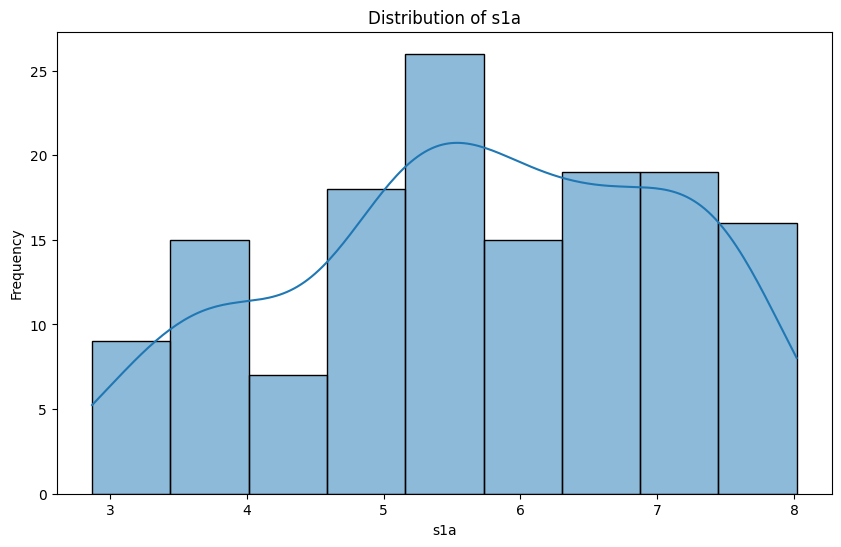


Analysis for column: s1x
Descriptive Statistics:
count    144.000000
mean       6.832194
std        1.568082
min        3.617600
25%        5.706050
50%        7.060100
75%        8.046950
max       10.227200
Name: s1x, dtype: float64


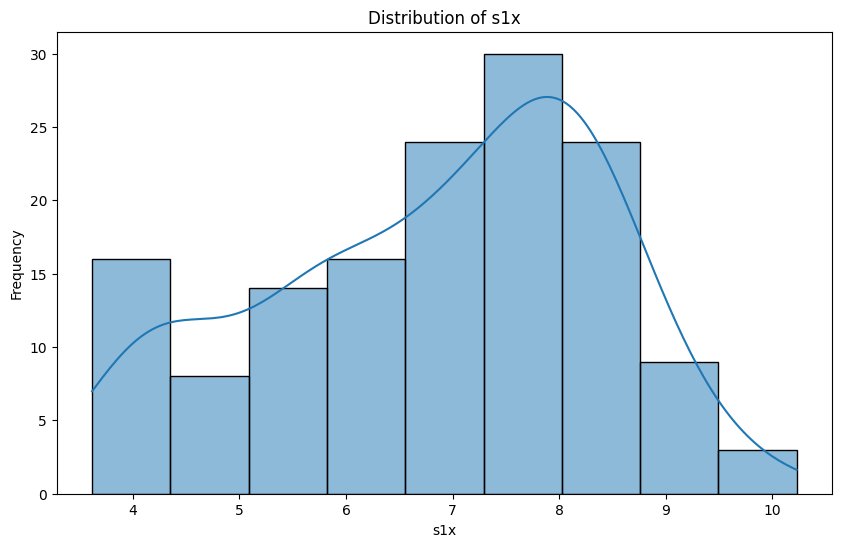


Analysis for column: s1i
Descriptive Statistics:
count    144.000000
mean       4.586281
std        1.517802
min        1.643900
25%        3.388100
50%        4.558550
75%        5.740475
max        7.565000
Name: s1i, dtype: float64


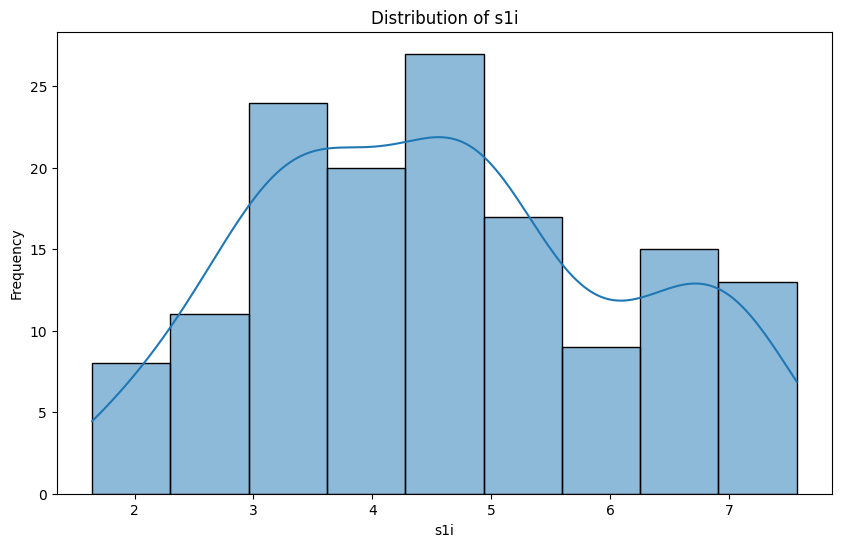


Analysis for column: s1s
Descriptive Statistics:
count    144.000000
mean       0.438377
std        0.281417
min        0.096390
25%        0.205403
50%        0.346545
75%        0.616208
max        1.257660
Name: s1s, dtype: float64


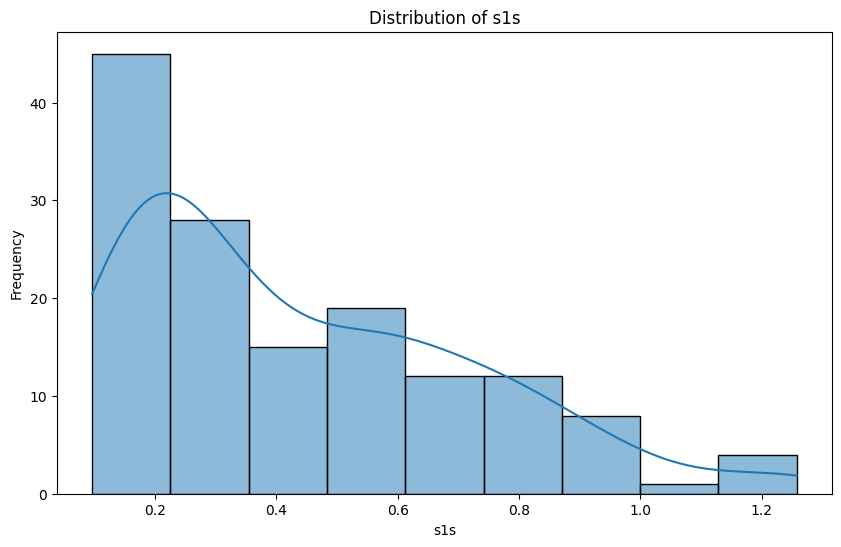


Analysis for column: s2a
Descriptive Statistics:
count    144.000000
mean       5.483136
std        1.534447
min        2.326810
25%        4.369360
50%        5.475550
75%        6.816978
max        8.004640
Name: s2a, dtype: float64


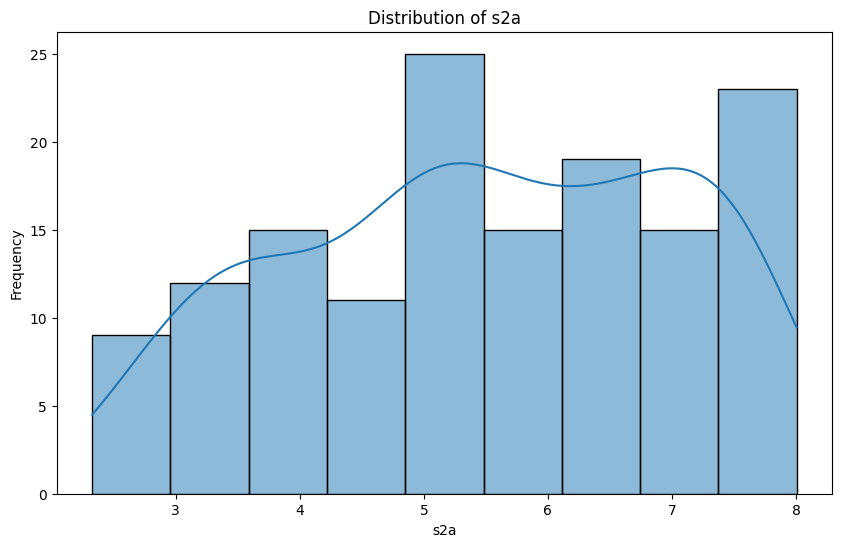


Analysis for column: s2x
Descriptive Statistics:
count    144.000000
mean       6.731744
std        1.659529
min        3.433000
25%        5.452600
50%        7.036150
75%        8.068900
max        9.767200
Name: s2x, dtype: float64


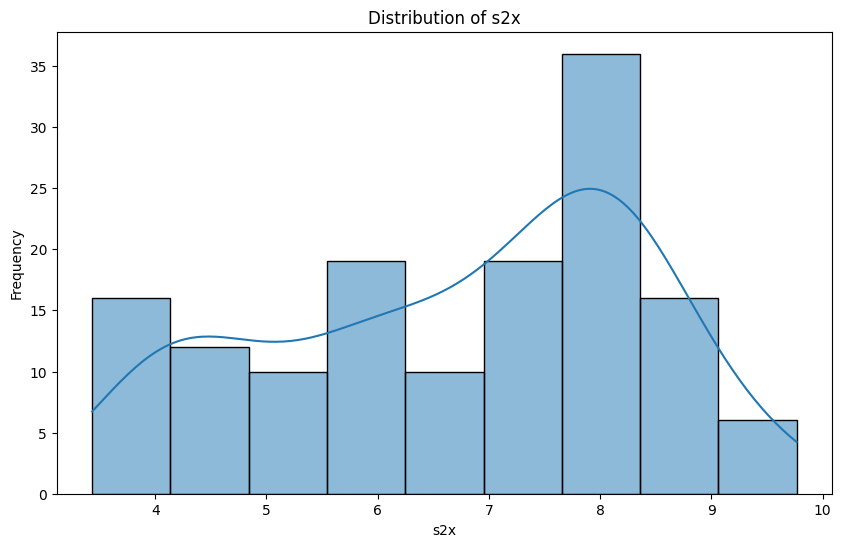


Analysis for column: s2i
Descriptive Statistics:
count    144.000000
mean       4.258244
std        1.677675
min        1.183900
25%        2.928100
50%        4.075600
75%        5.509975
max        7.472200
Name: s2i, dtype: float64


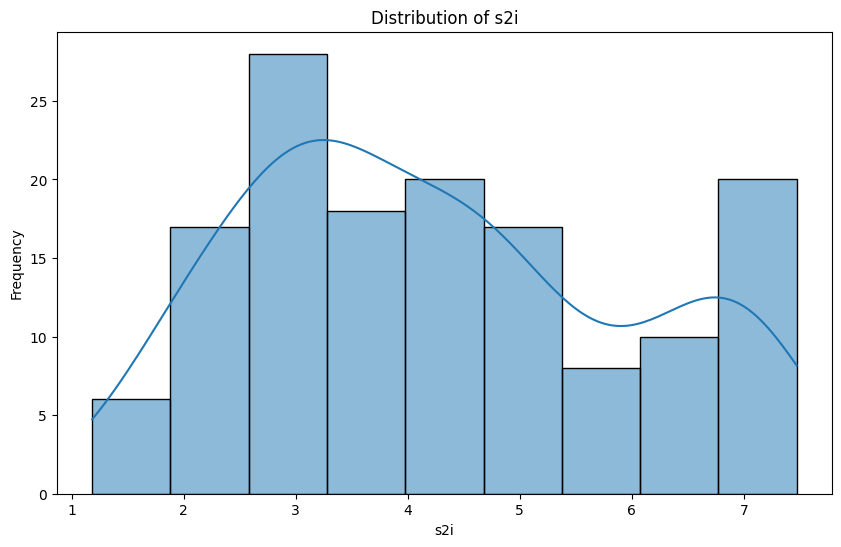


Analysis for column: s2s
Descriptive Statistics:
count    144.000000
mean       0.491736
std        0.284931
min        0.100980
25%        0.242122
50%        0.445230
75%        0.679320
max        1.372410
Name: s2s, dtype: float64


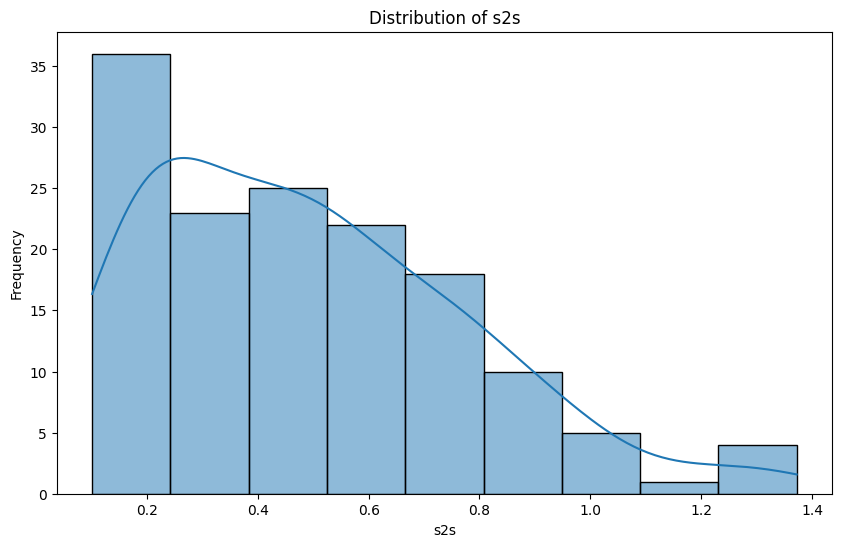


Analysis for column: s3a
Descriptive Statistics:
count    144.000000
mean       5.253473
std        1.482861
min        2.172470
25%        4.003833
50%        5.300810
75%        6.519802
max        7.947510
Name: s3a, dtype: float64


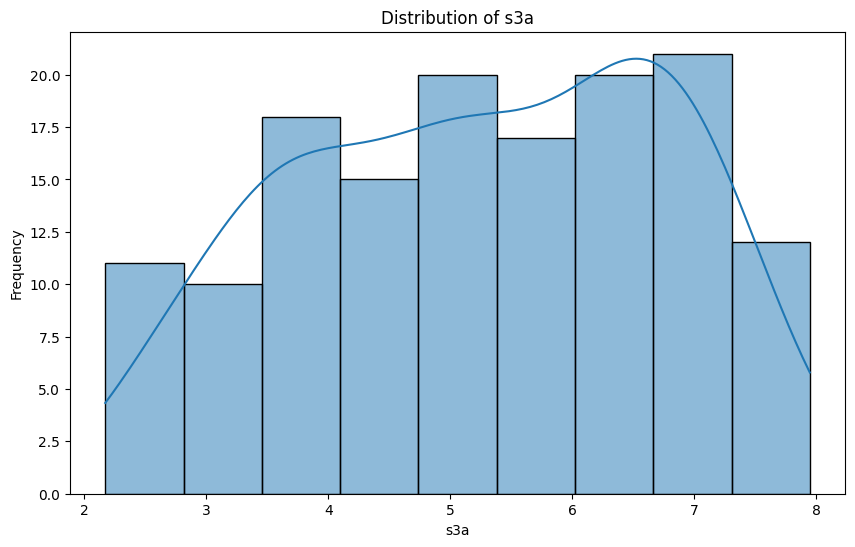


Analysis for column: s3x
Descriptive Statistics:
count    144.000000
mean       6.543822
std        1.689109
min        3.204550
25%        5.268700
50%        6.942955
75%        7.803018
max        9.763960
Name: s3x, dtype: float64


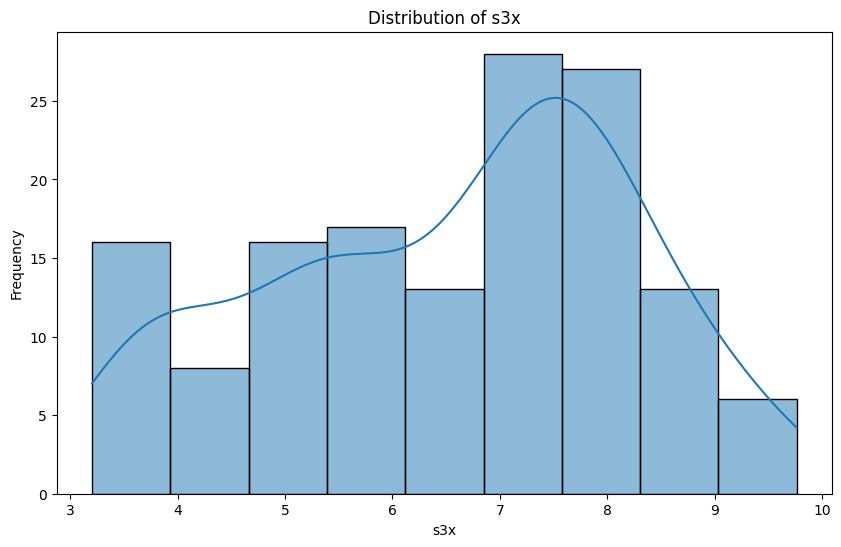


Analysis for column: s3i
Descriptive Statistics:
count    144.000000
mean       3.996445
std        1.490144
min        1.048660
25%        2.917863
50%        3.709120
75%        5.188428
max        7.057630
Name: s3i, dtype: float64


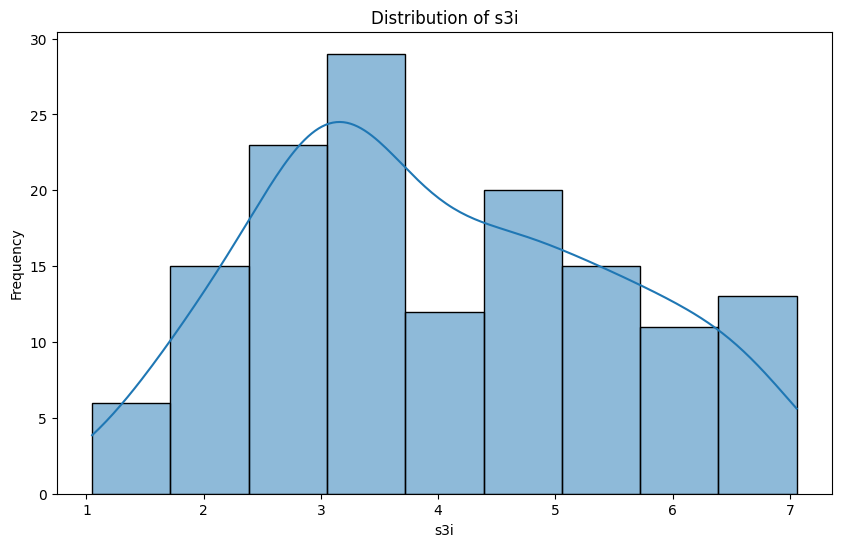


Analysis for column: s3s
Descriptive Statistics:
count    144.000000
mean       0.494122
std        0.288754
min        0.110090
25%        0.275220
50%        0.426590
75%        0.620395
max        1.467840
Name: s3s, dtype: float64


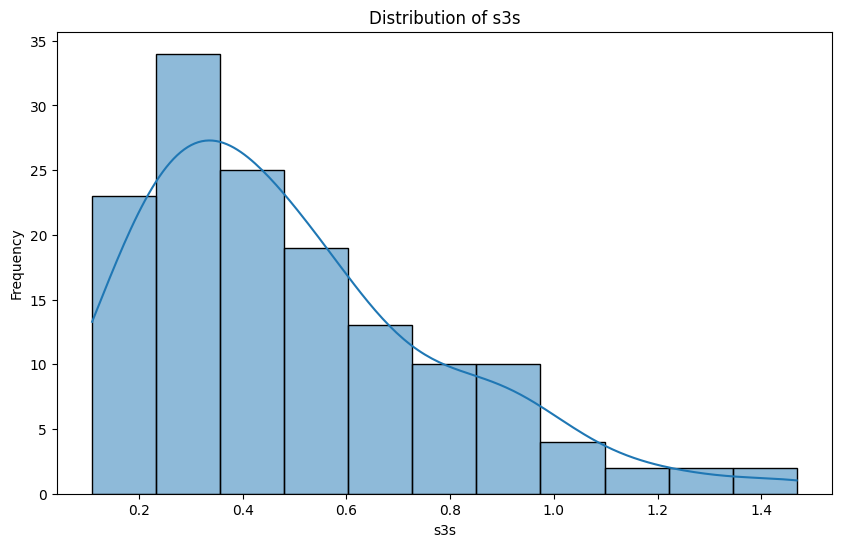


Analysis for column: d1a
Descriptive Statistics:
count    144.000000
mean     155.569444
std       16.712983
min      118.000000
25%      146.000000
50%      152.000000
75%      164.500000
max      191.000000
Name: d1a, dtype: float64


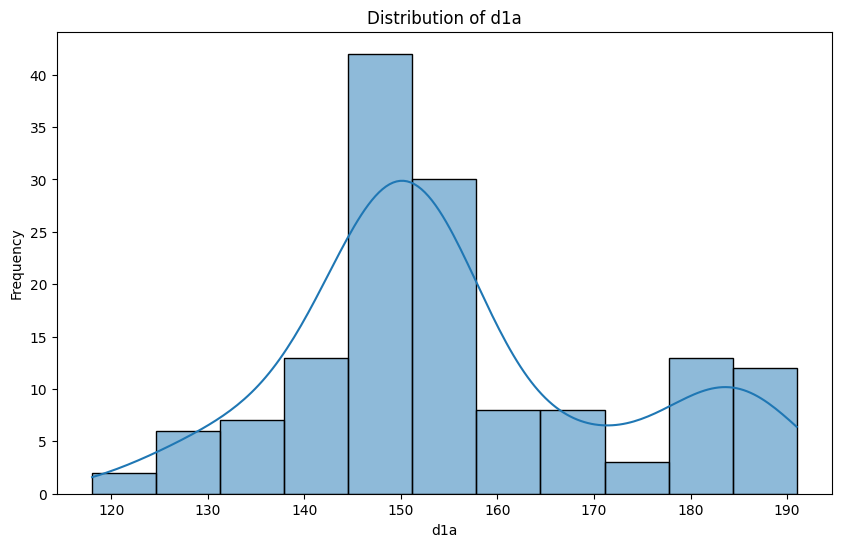


Analysis for column: d1s
Descriptive Statistics:
count    144.000000
mean       4.993056
std        4.058138
min        1.000000
25%        2.000000
50%        4.000000
75%        7.000000
max       22.000000
Name: d1s, dtype: float64


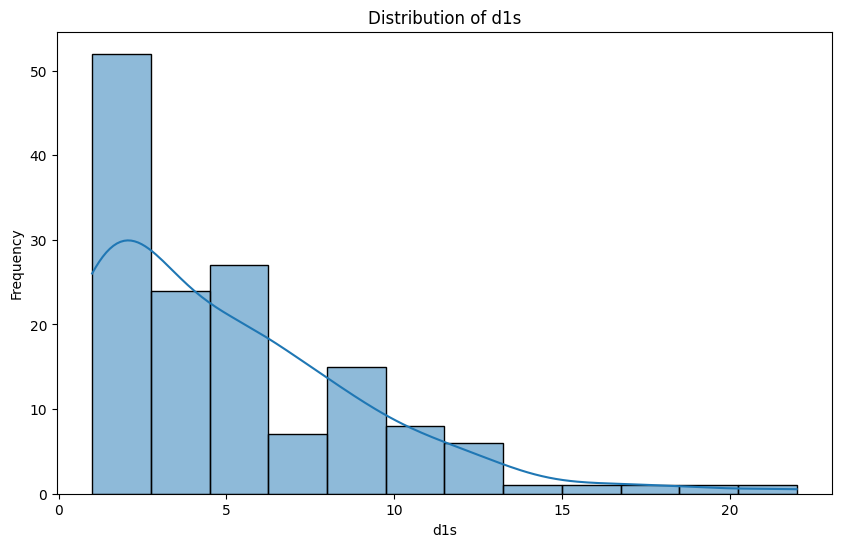


Analysis for column: d2a
Descriptive Statistics:
count    144.000000
mean     152.680556
std       17.234156
min      119.000000
25%      139.000000
50%      149.000000
75%      163.000000
max      193.000000
Name: d2a, dtype: float64


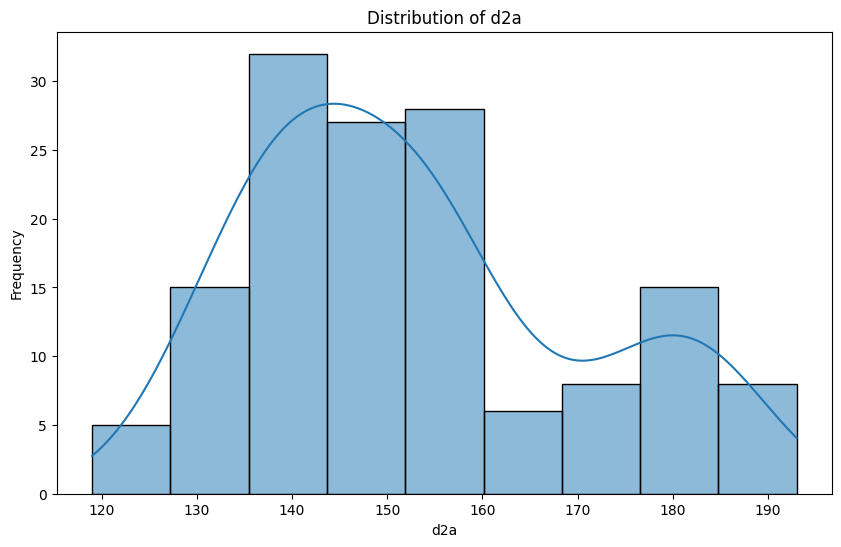


Analysis for column: d2s
Descriptive Statistics:
count    144.000000
mean       5.548611
std        4.348185
min        1.000000
25%        2.000000
50%        4.000000
75%        8.000000
max       22.000000
Name: d2s, dtype: float64


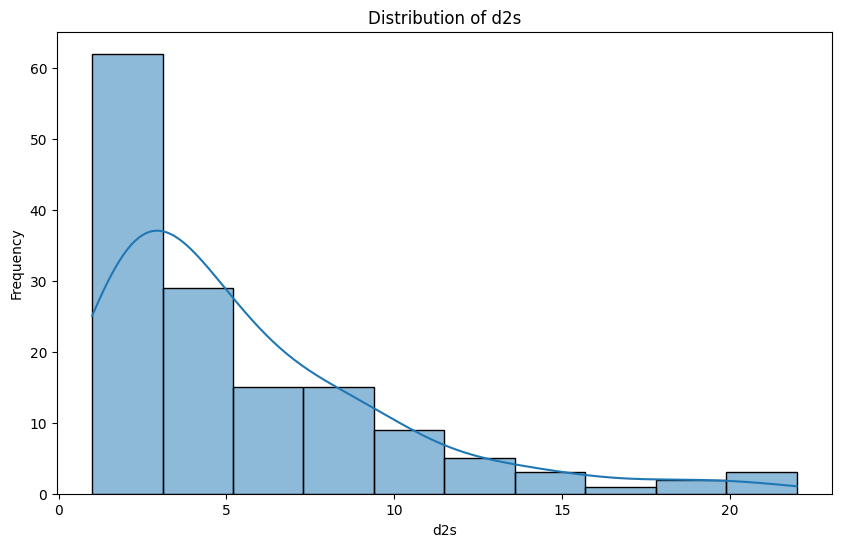


Analysis for column: h1a
Descriptive Statistics:
count    144.000000
mean      69.631944
std        4.190810
min       63.000000
25%       66.000000
50%       71.000000
75%       72.000000
max       81.000000
Name: h1a, dtype: float64


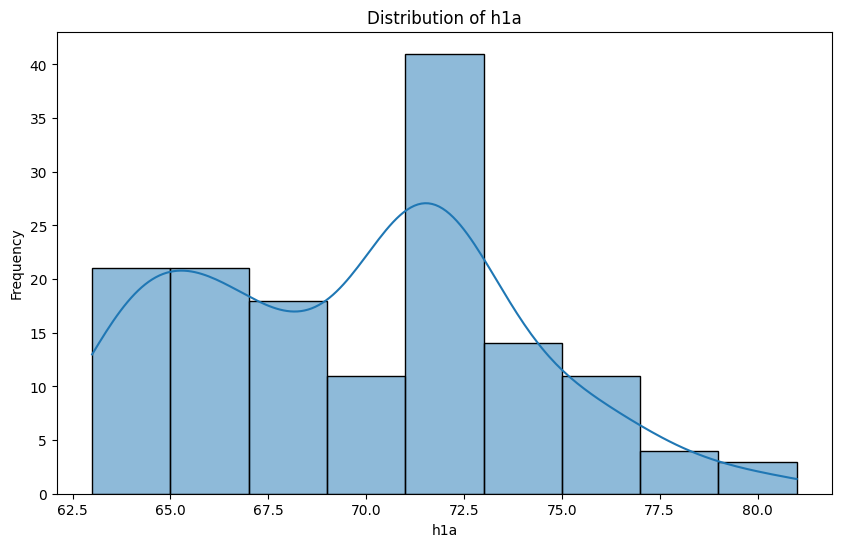


Analysis for column: h1x
Descriptive Statistics:
count    144.000000
mean      70.486111
std        4.338776
min       63.000000
25%       67.000000
50%       71.000000
75%       73.000000
max       81.000000
Name: h1x, dtype: float64


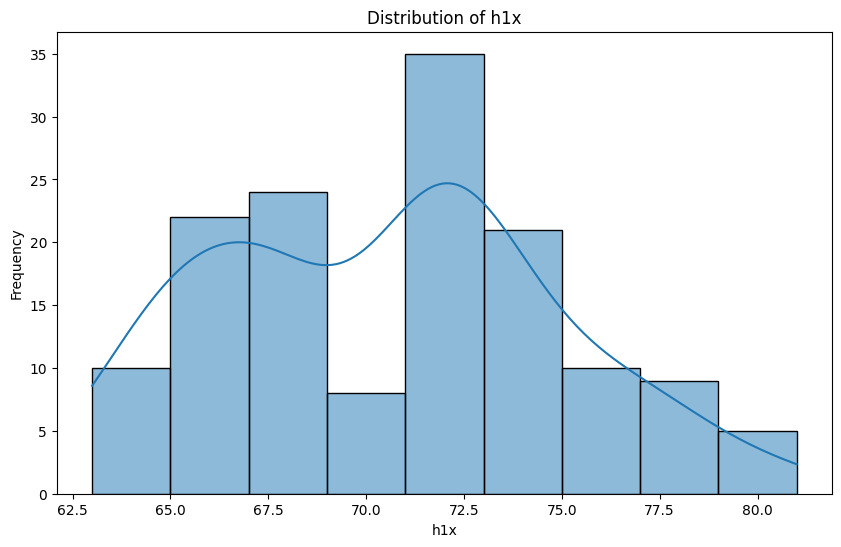


Analysis for column: h1i
Descriptive Statistics:
count    144.000000
mean      68.812500
std        4.112013
min       62.000000
25%       65.000000
50%       70.000000
75%       71.000000
max       80.000000
Name: h1i, dtype: float64


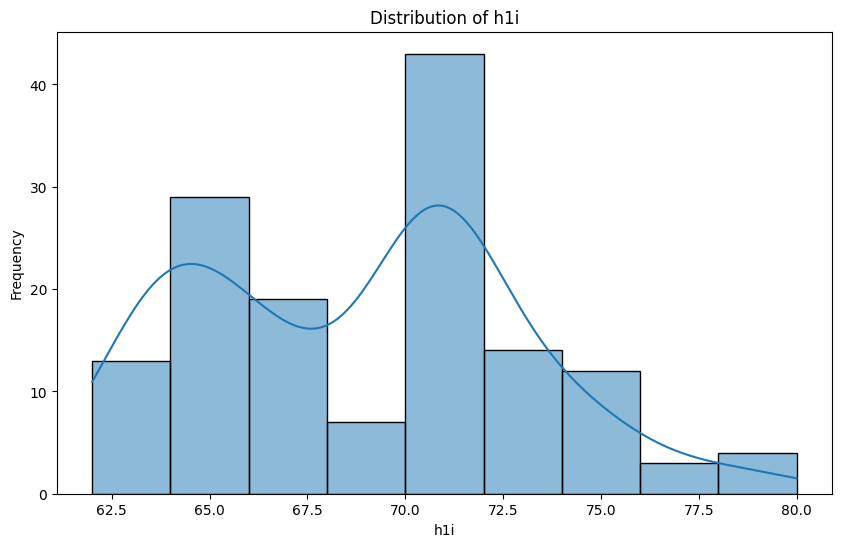


Analysis for column: t1a
Descriptive Statistics:
count    144.000000
mean      -1.188194
std        1.380230
min       -3.550000
25%       -2.650000
50%       -1.150000
75%        0.250000
max        0.550000
Name: t1a, dtype: float64


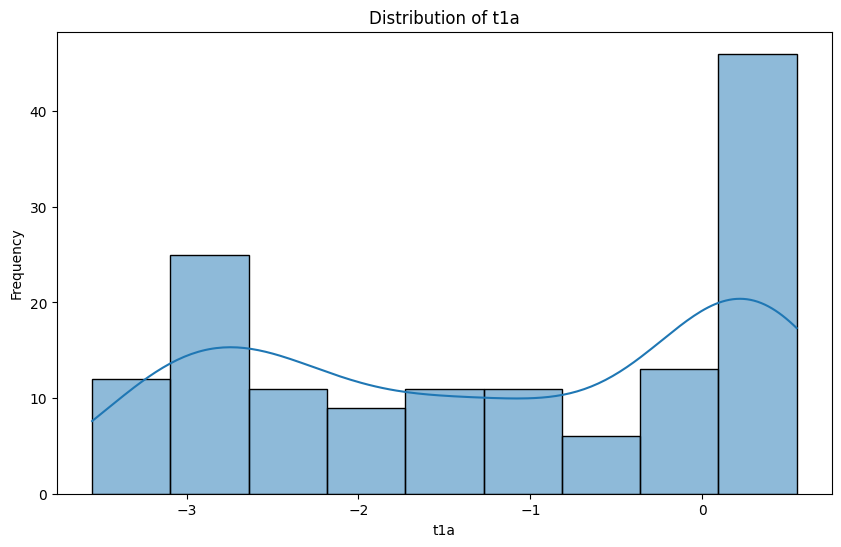


Analysis for column: t1x
Descriptive Statistics:
count    144.000000
mean      -1.116667
std        1.358218
min       -3.350000
25%       -2.550000
50%       -1.000000
75%        0.250000
max        0.550000
Name: t1x, dtype: float64


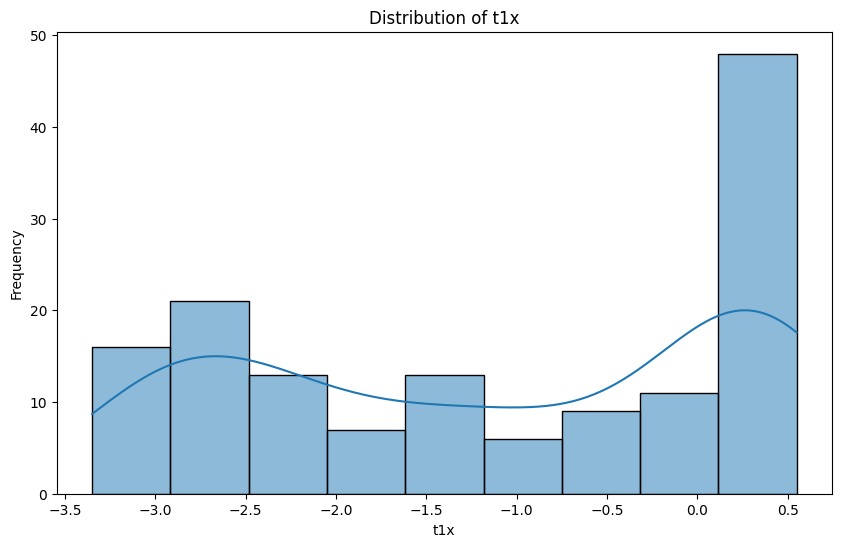


Analysis for column: t1i
Descriptive Statistics:
count    144.000000
mean      -1.262500
std        1.401791
min       -3.550000
25%       -2.675000
50%       -1.250000
75%        0.250000
max        0.550000
Name: t1i, dtype: float64


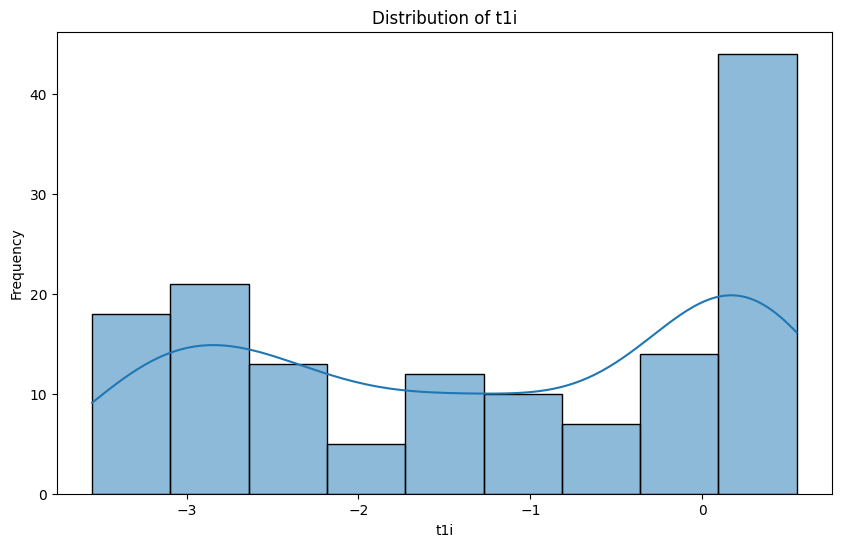


Analysis for column: b1a
Descriptive Statistics:
count     144.000000
mean     1015.263889
std         1.604130
min      1013.000000
25%      1014.000000
50%      1015.000000
75%      1016.250000
max      1019.000000
Name: b1a, dtype: float64


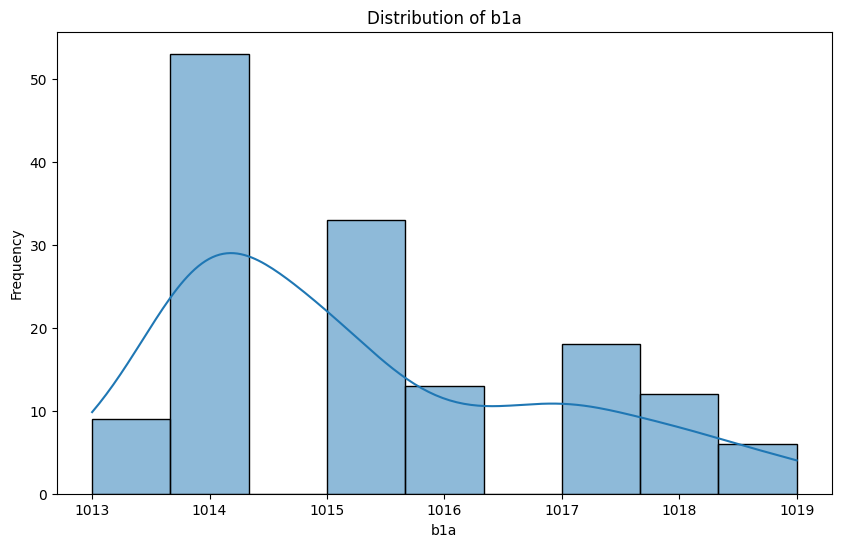


Analysis for column: b1x
Descriptive Statistics:
count     144.000000
mean     1015.805556
std         1.547738
min      1013.000000
25%      1015.000000
50%      1015.000000
75%      1017.000000
max      1020.000000
Name: b1x, dtype: float64


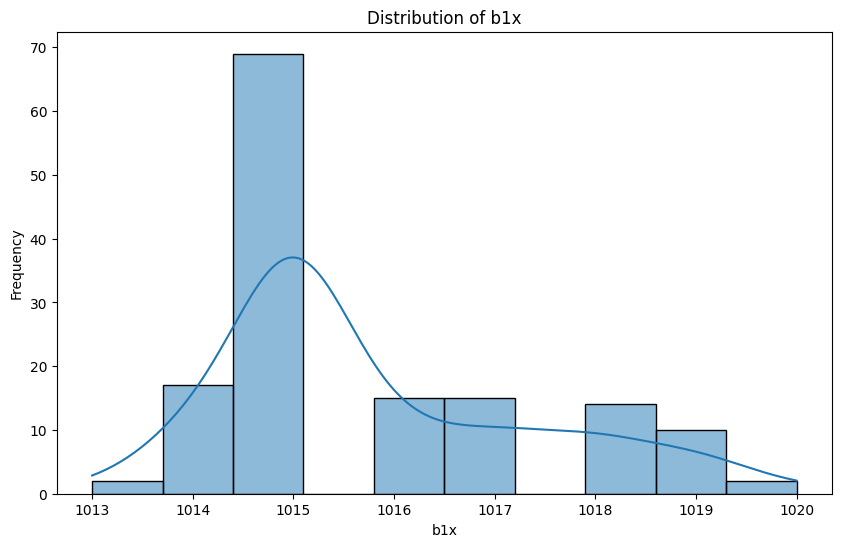


Analysis for column: b1i
Descriptive Statistics:
count     144.000000
mean     1014.958333
std         1.603645
min      1013.000000
25%      1014.000000
50%      1014.000000
75%      1016.000000
max      1019.000000
Name: b1i, dtype: float64


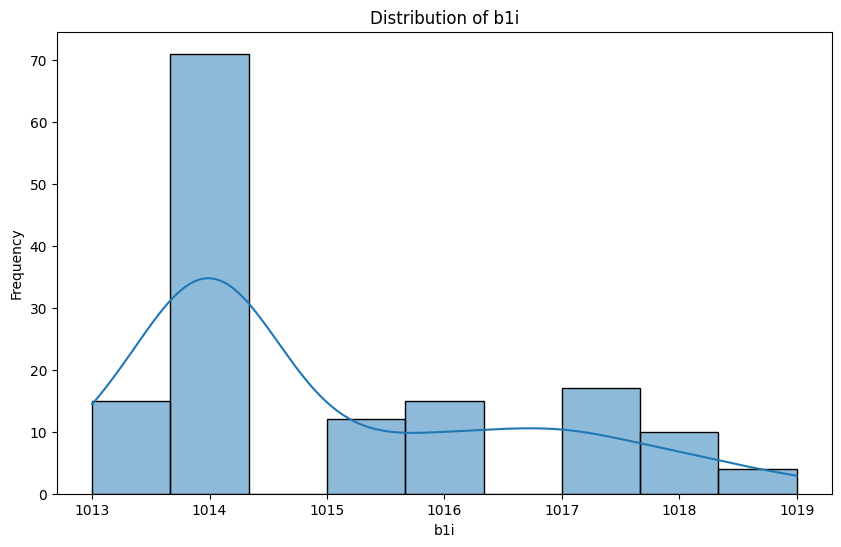


Analysis for column: p1a
Descriptive Statistics:
count    144.000000
mean       4.747666
std        1.302431
min        1.915280
25%        3.787107
50%        4.904705
75%        5.624550
max        7.284320
Name: p1a, dtype: float64


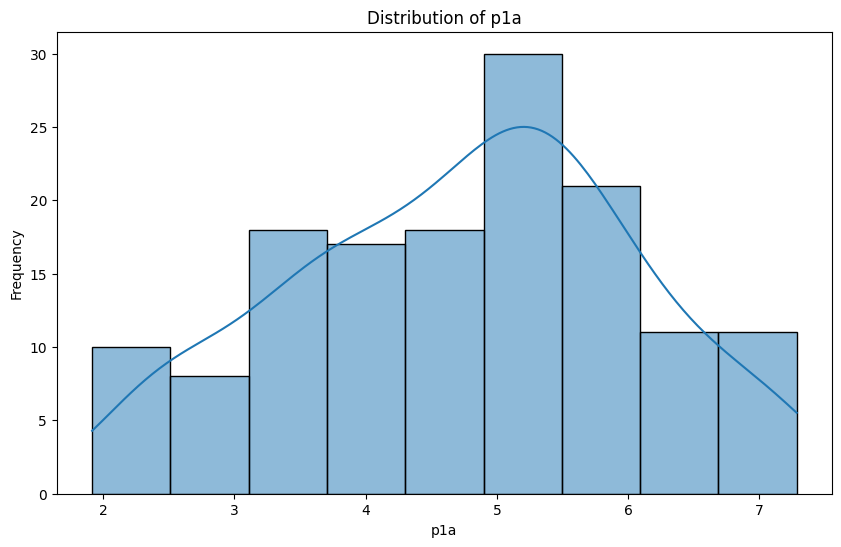


Analysis for column: p1x
Descriptive Statistics:
count    144.000000
mean       6.002234
std        1.785787
min        2.658050
25%        4.767150
50%        5.844625
75%        7.380600
max       10.315000
Name: p1x, dtype: float64


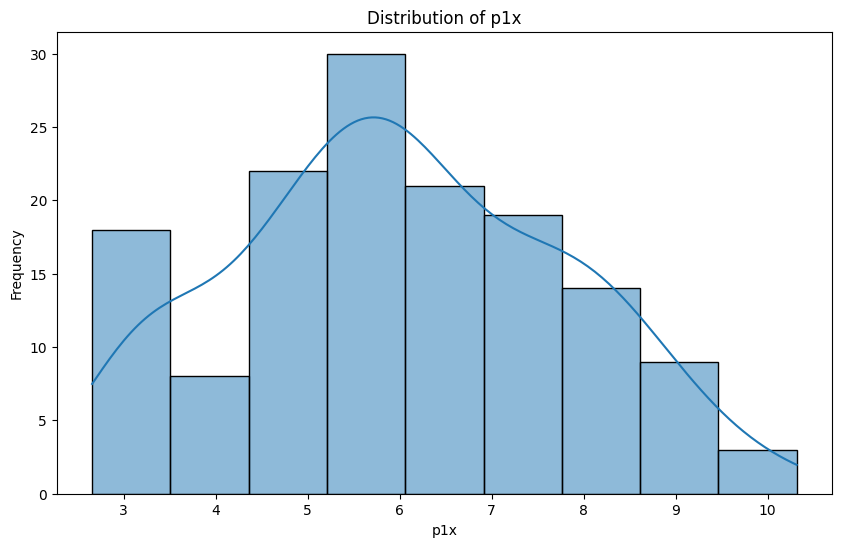


Analysis for column: p1i
Descriptive Statistics:
count    144.000000
mean       3.518056
std        1.135448
min        0.824050
25%        2.738288
50%        3.529200
75%        4.457662
max        5.638300
Name: p1i, dtype: float64


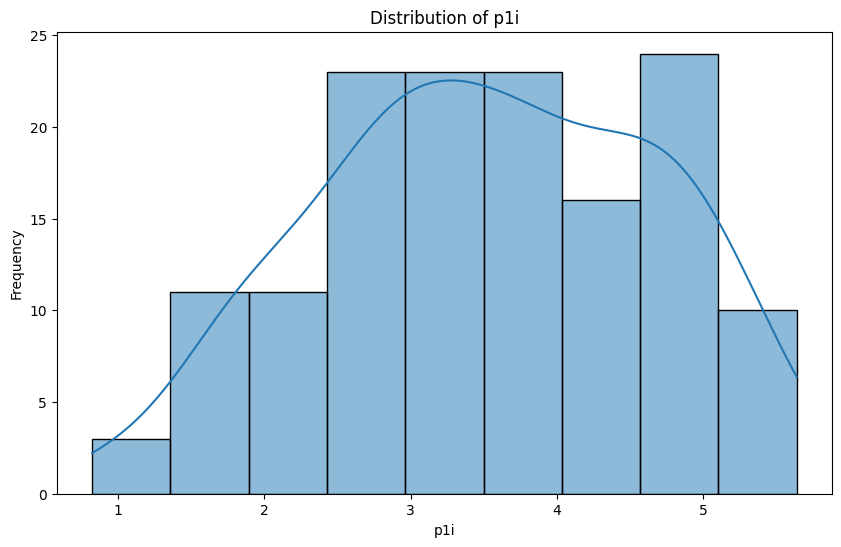


Analysis for column: p1s
Descriptive Statistics:
count    144.000000
mean       0.481810
std        0.303227
min        0.087120
25%        0.240718
50%        0.387435
75%        0.664830
max        1.435110
Name: p1s, dtype: float64


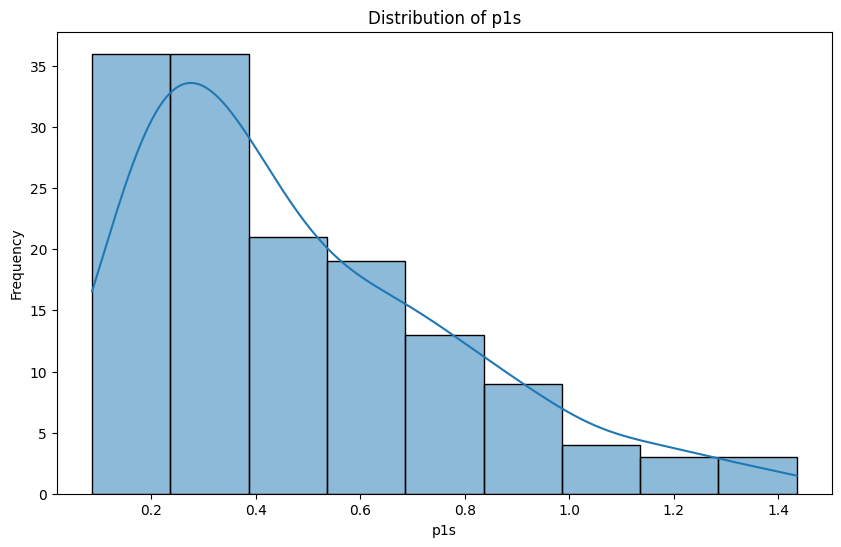


Analysis for column: tia
Descriptive Statistics:
count    144.000000
mean      39.055556
std        2.910742
min       34.000000
25%       37.000000
50%       40.000000
75%       41.000000
max       44.000000
Name: tia, dtype: float64


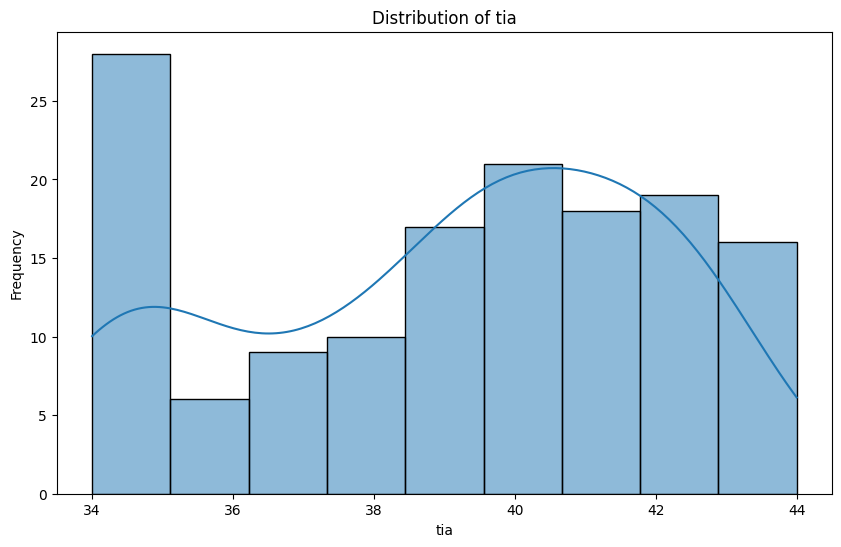


Analysis for column: tix
Descriptive Statistics:
count    144.000000
mean      39.118056
std        2.910066
min       34.000000
25%       37.000000
50%       40.000000
75%       41.250000
max       44.000000
Name: tix, dtype: float64


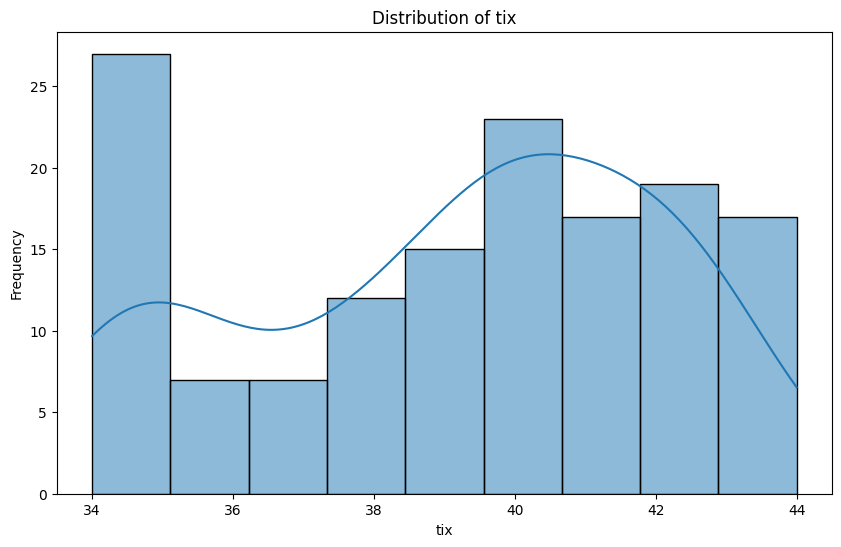


Analysis for column: tii
Descriptive Statistics:
count    144.000000
mean      38.986111
std        2.906434
min       34.000000
25%       37.000000
50%       40.000000
75%       41.000000
max       44.000000
Name: tii, dtype: float64


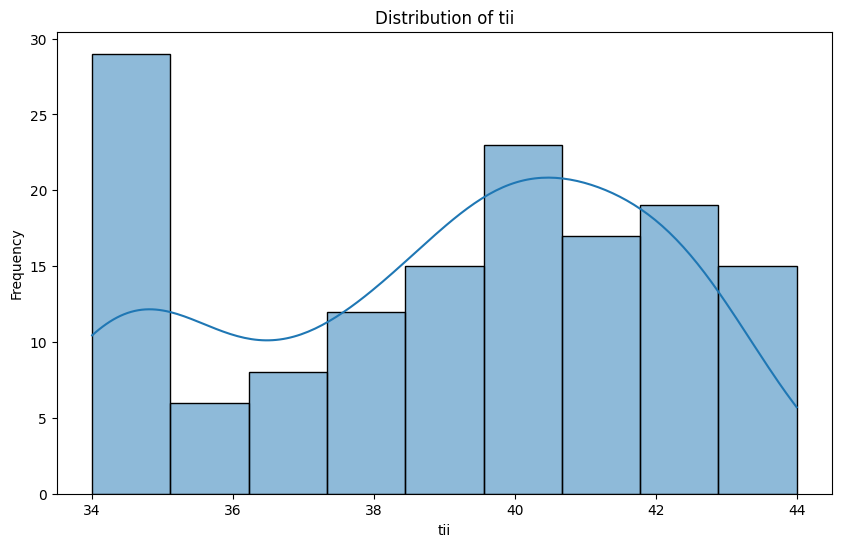


Analysis for column: vxa
Descriptive Statistics:
count    144.000000
mean     131.527778
std        6.792576
min      124.000000
25%      125.750000
50%      127.000000
75%      139.000000
max      140.000000
Name: vxa, dtype: float64


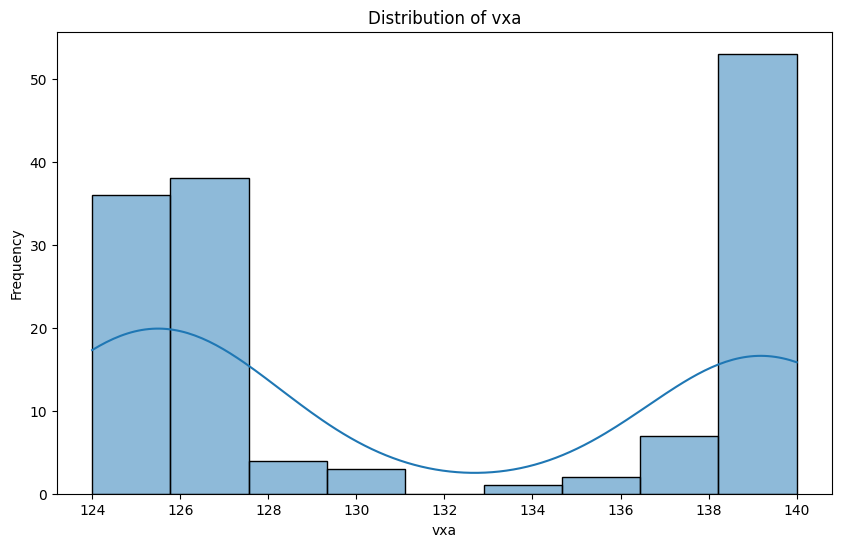


Analysis for column: vxx
Descriptive Statistics:
count    144.000000
mean     131.979167
std        7.110977
min      124.000000
25%      126.000000
50%      127.000000
75%      140.000000
max      143.000000
Name: vxx, dtype: float64


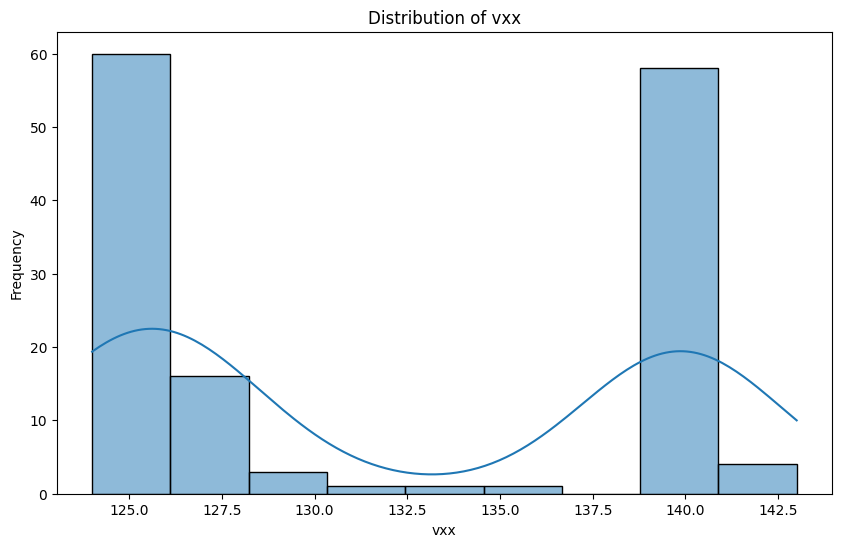


Analysis for column: vxi
Descriptive Statistics:
count    144.000000
mean     130.944444
std        6.441537
min      124.000000
25%      125.000000
50%      127.000000
75%      138.000000
max      140.000000
Name: vxi, dtype: float64


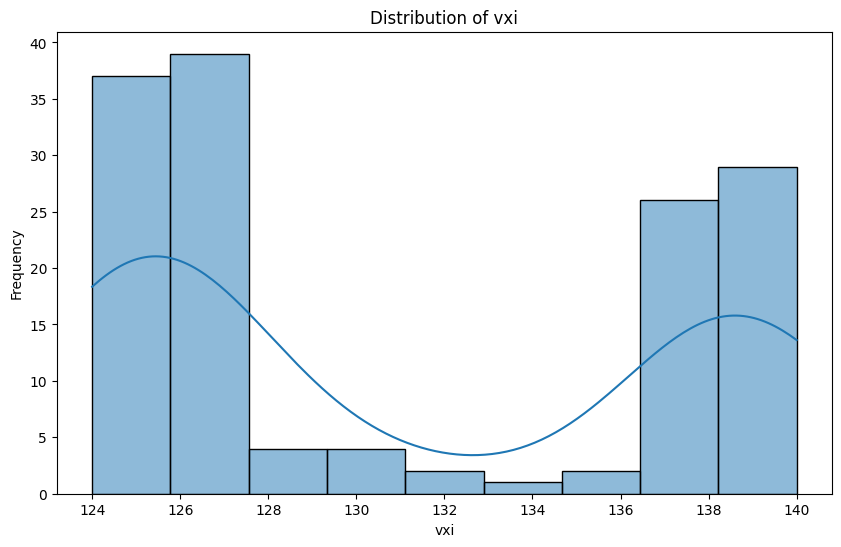


Analysis for column: bla
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bla, dtype: float64


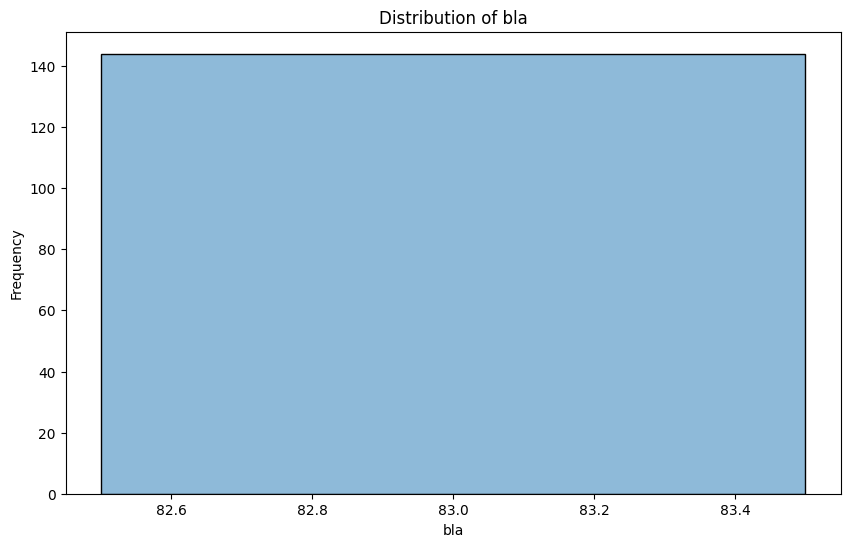


Analysis for column: blx
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: blx, dtype: float64


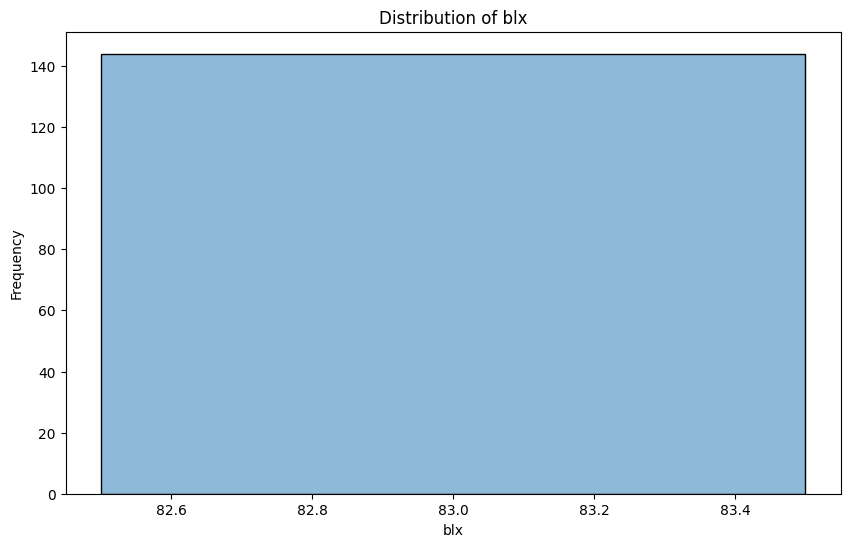


Analysis for column: bli
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bli, dtype: float64


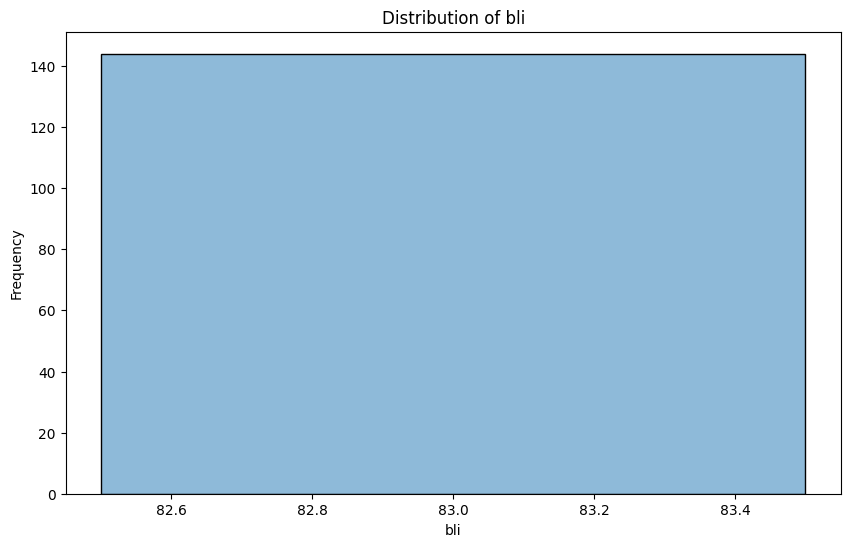


Analysis for column: bra
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bra, dtype: float64


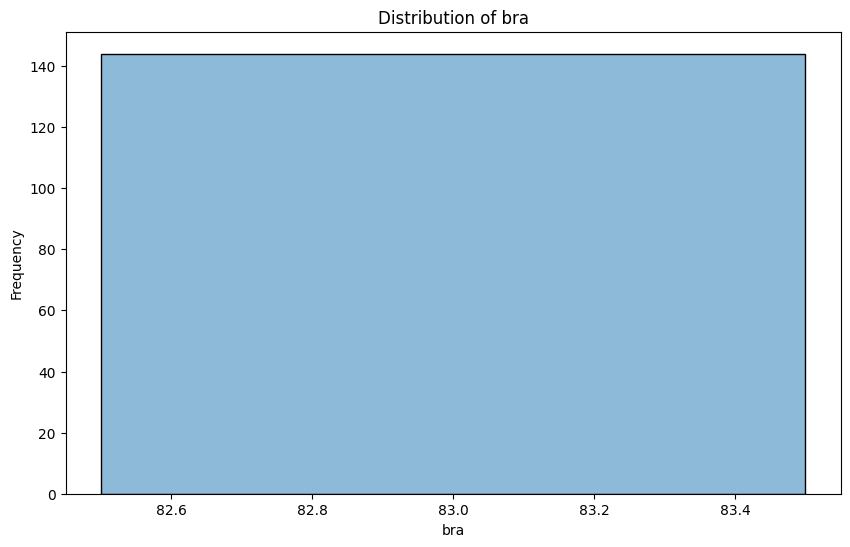


Analysis for column: brx
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: brx, dtype: float64


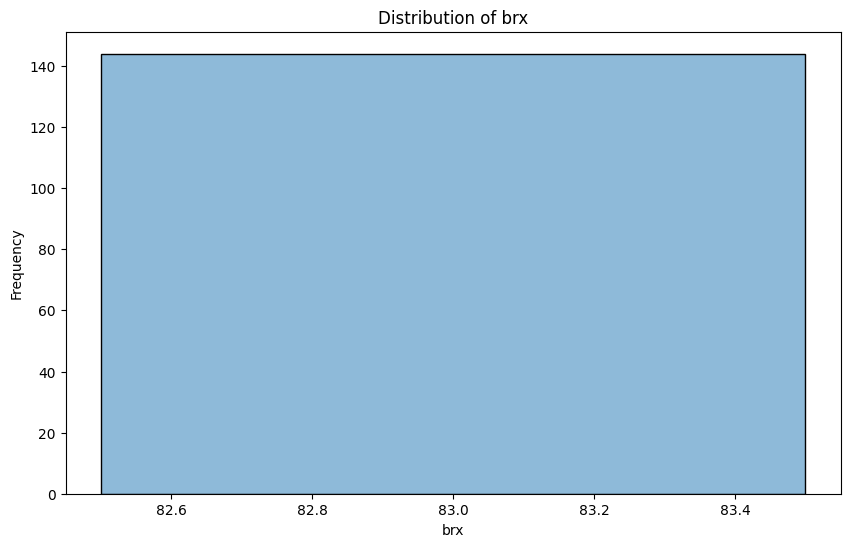


Analysis for column: bri
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bri, dtype: float64


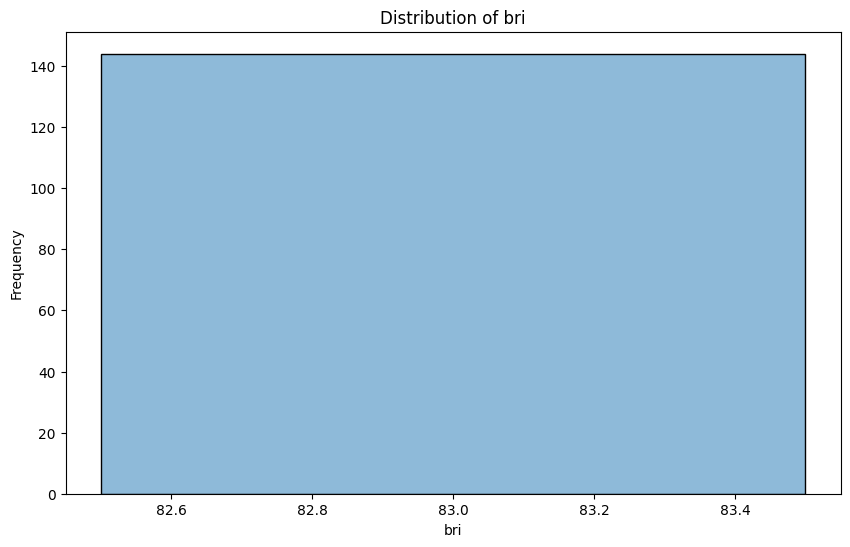

In [5]:
# Perform Statistical data analysis for each column
for column in df.columns:
    if column not in ['date', 'time', 'period']:
        print("\nAnalysis for column:", column)
        
        # Descriptive statistics
        print("Descriptive Statistics:")
        print(df[column].describe())
        
        # Data visualization
        plt.figure(figsize=(10, 6))
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()  

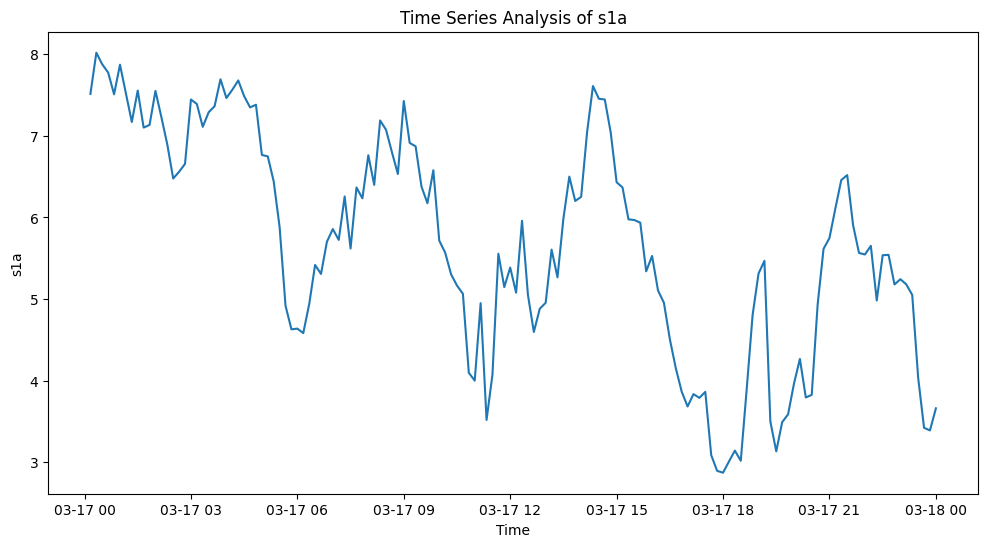

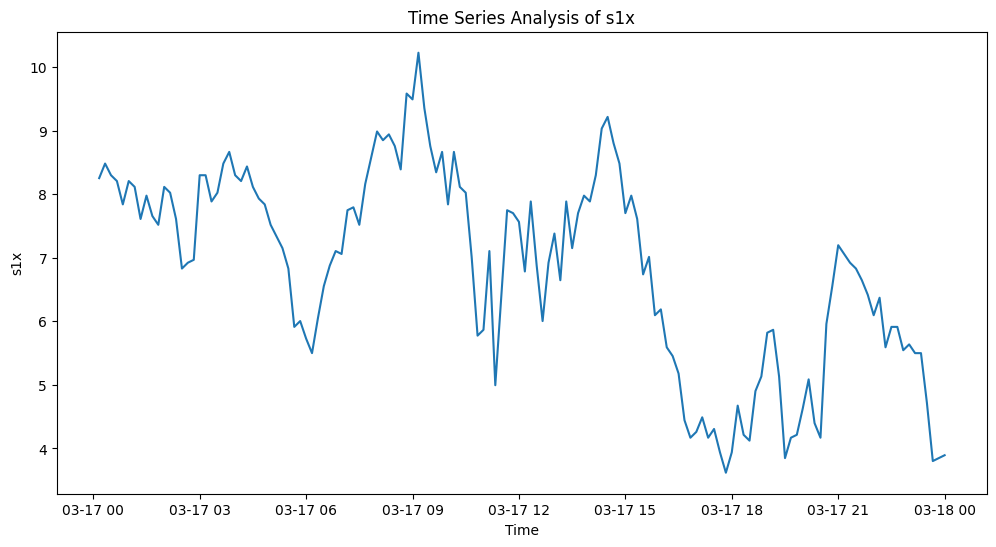

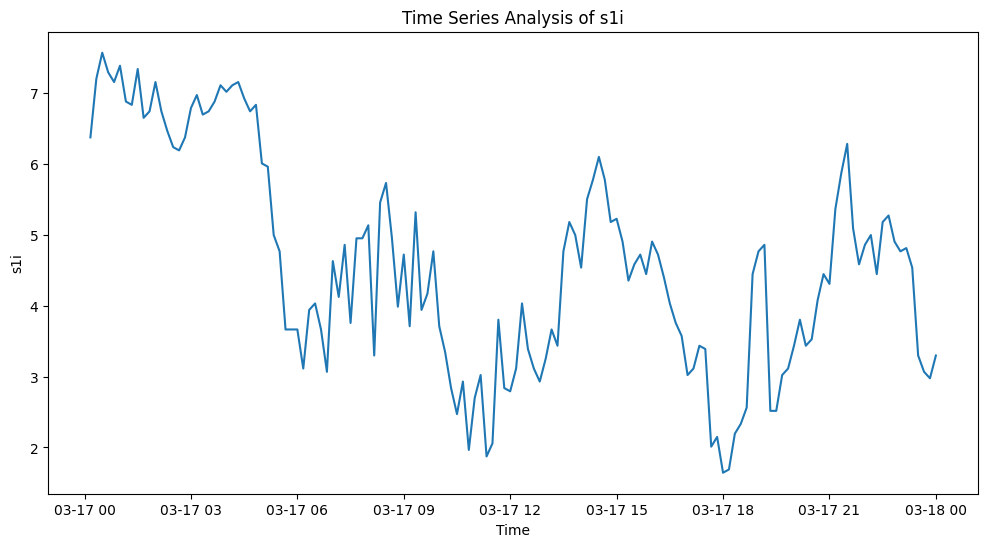

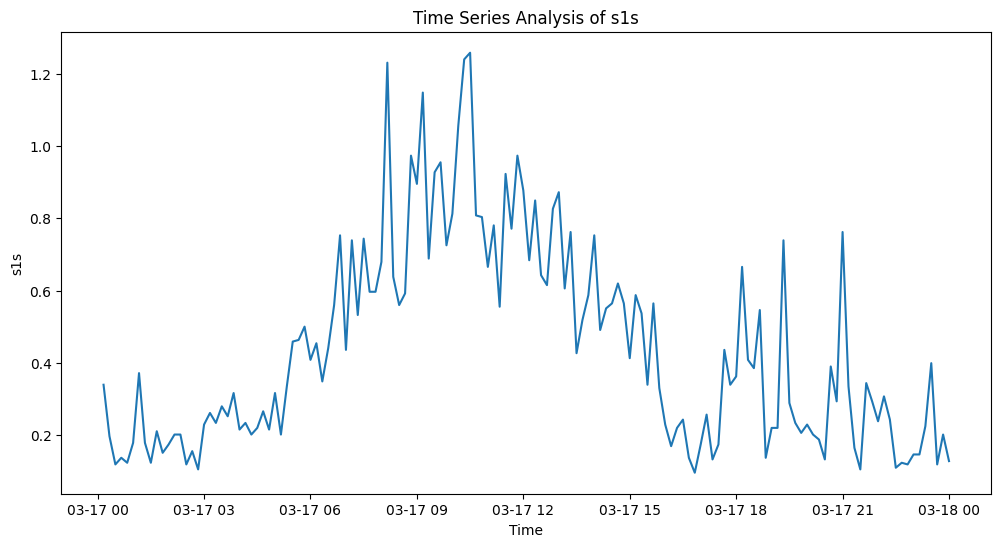

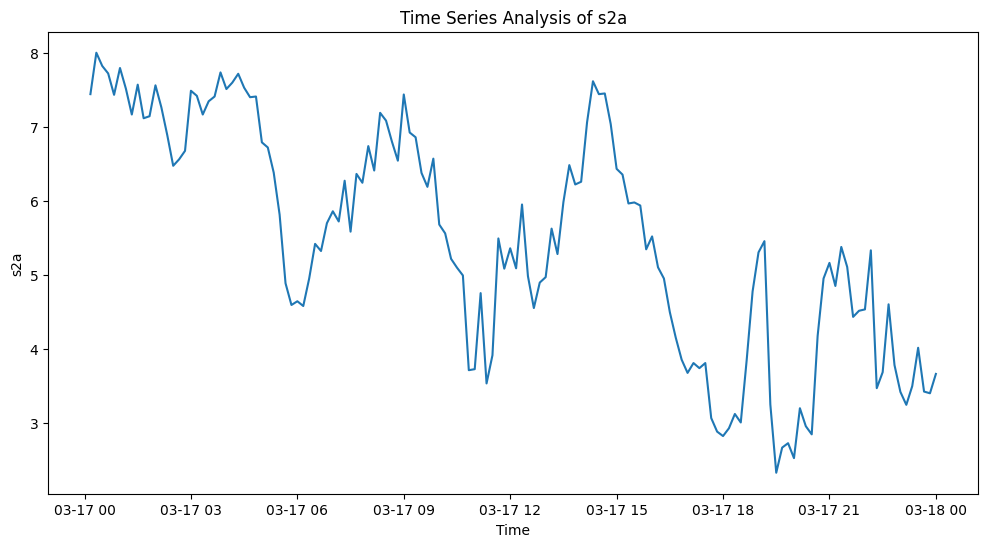

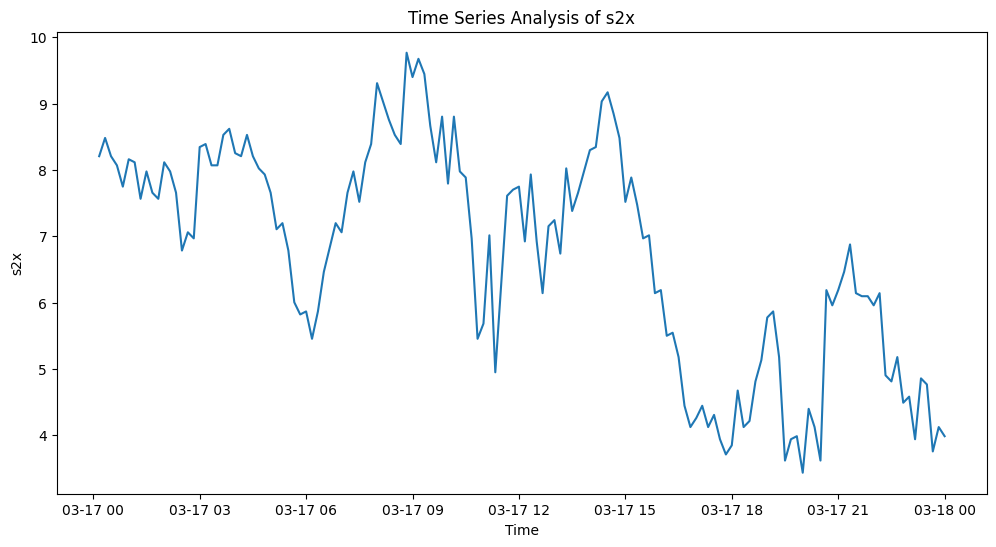

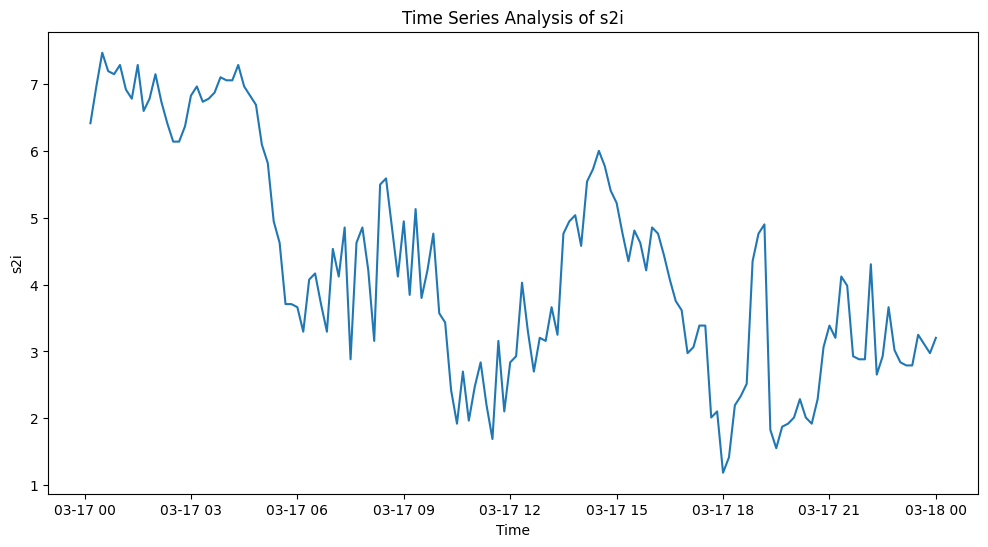

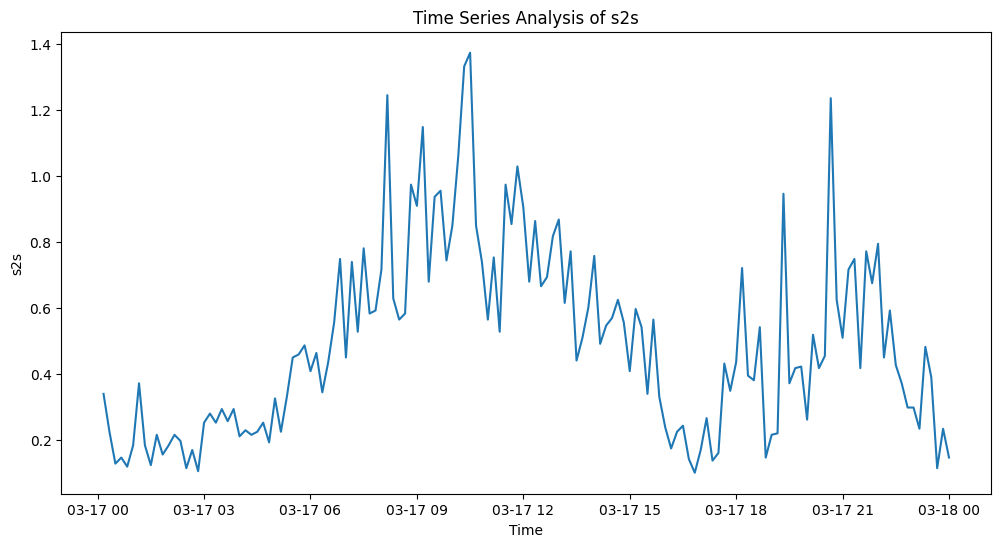

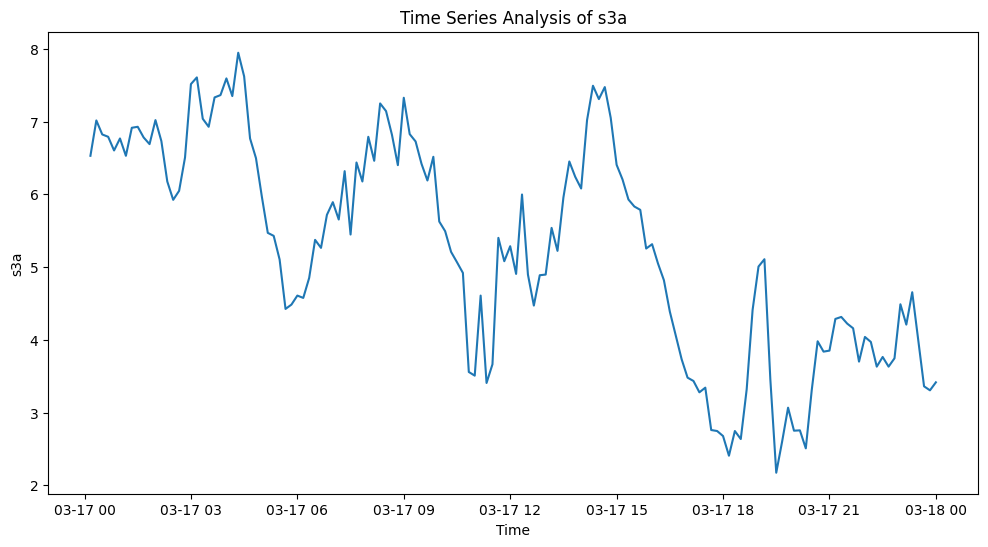

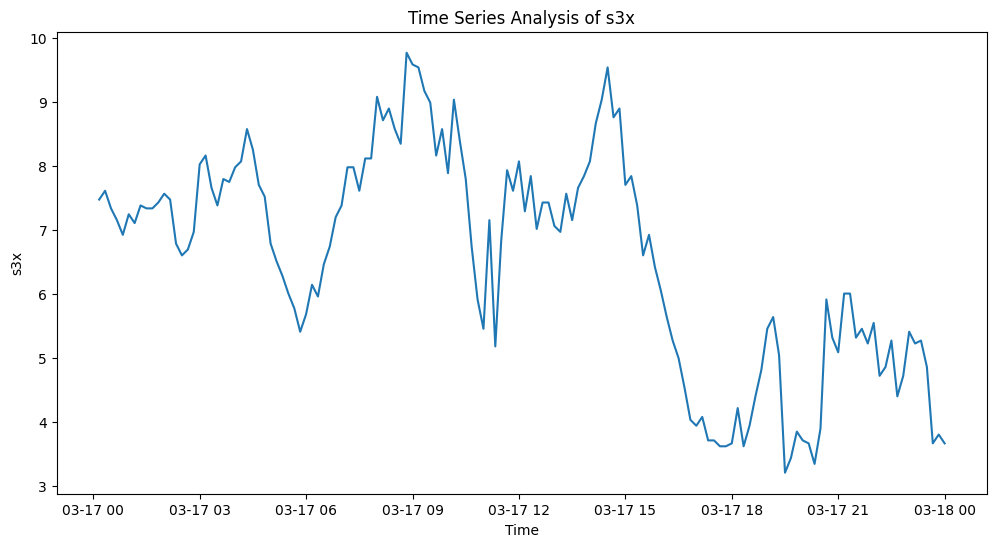

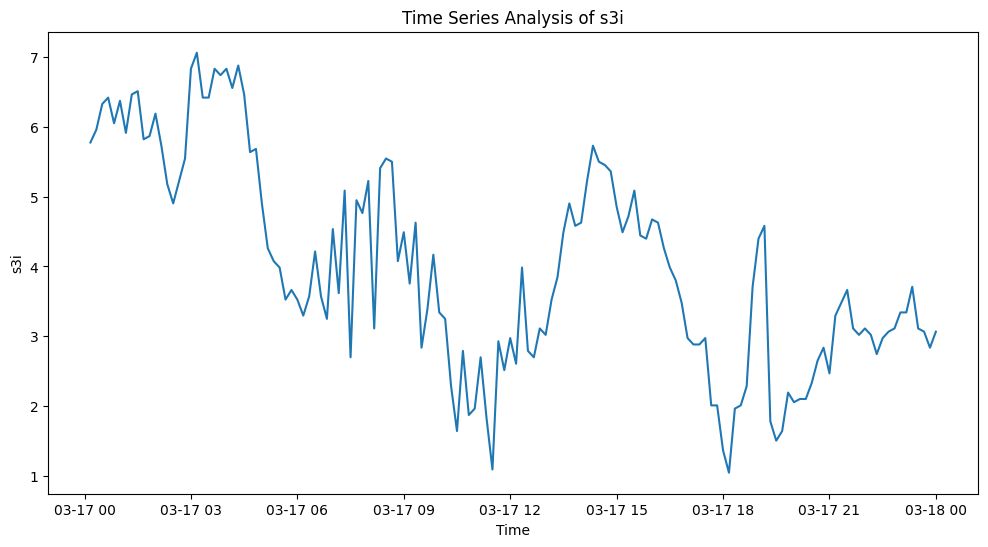

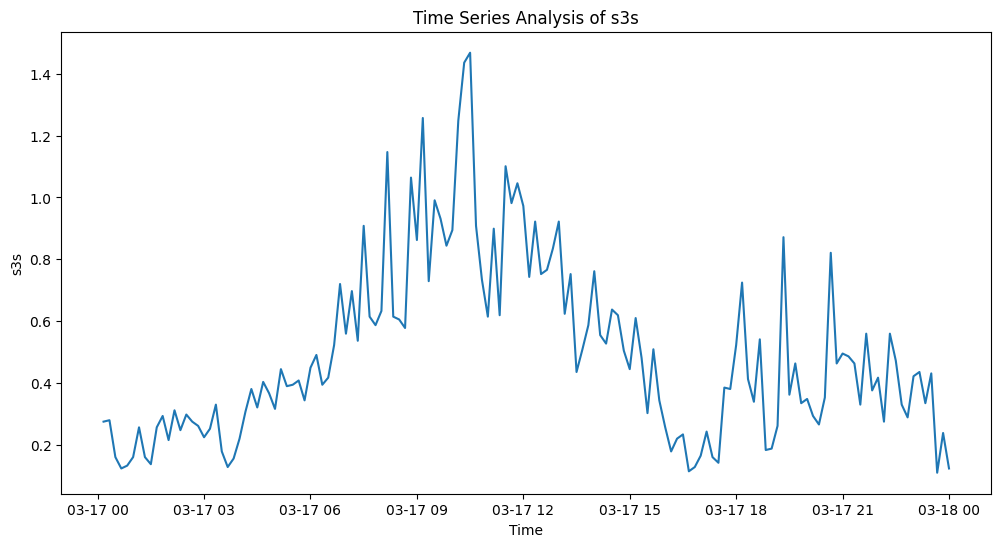

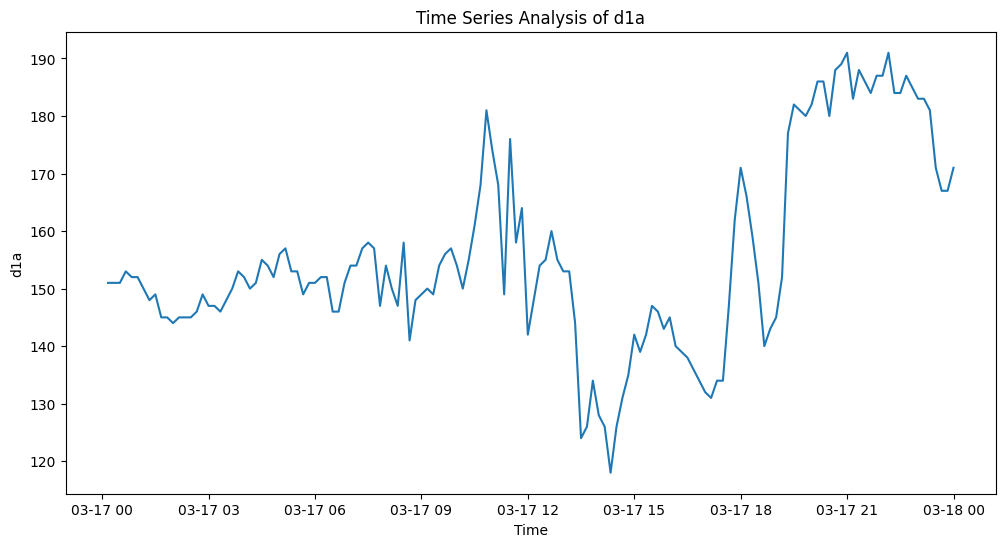

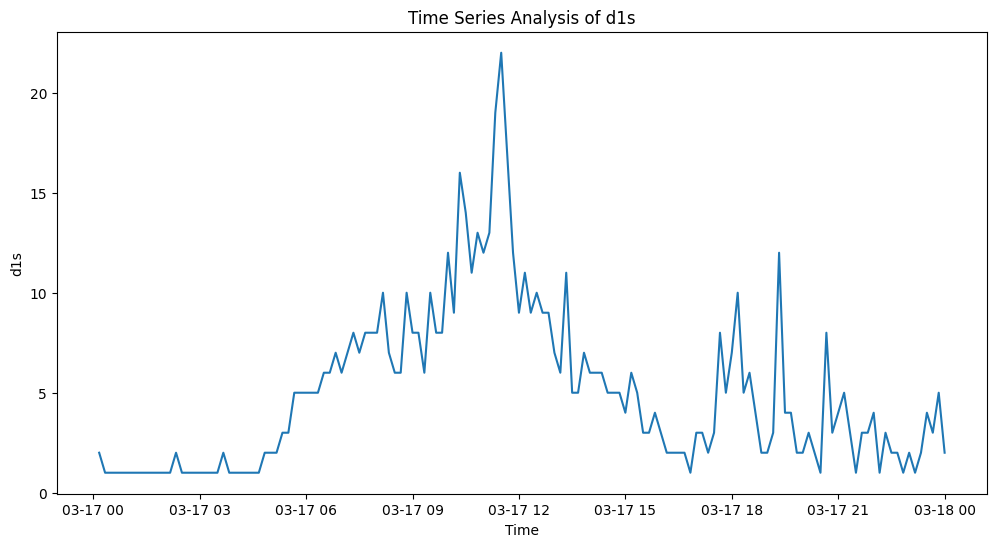

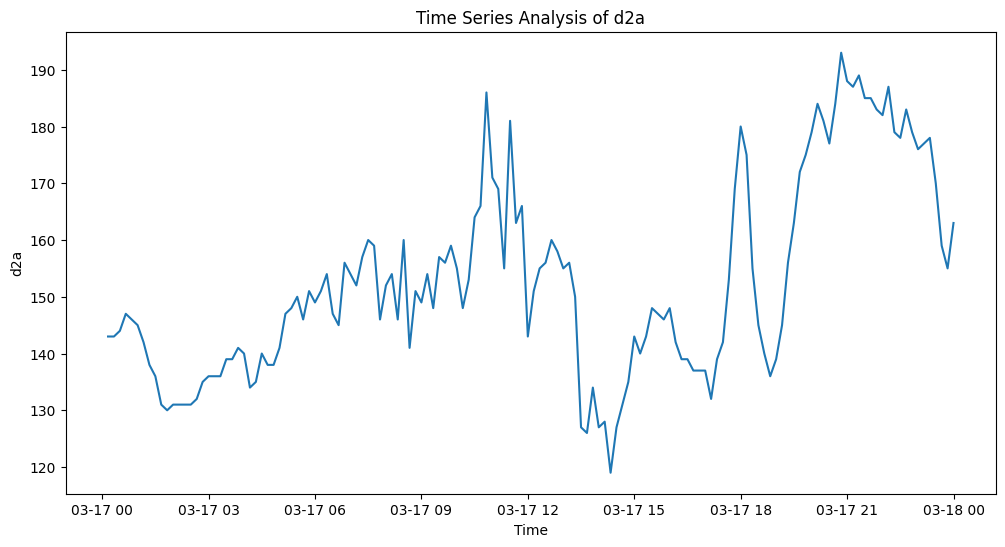

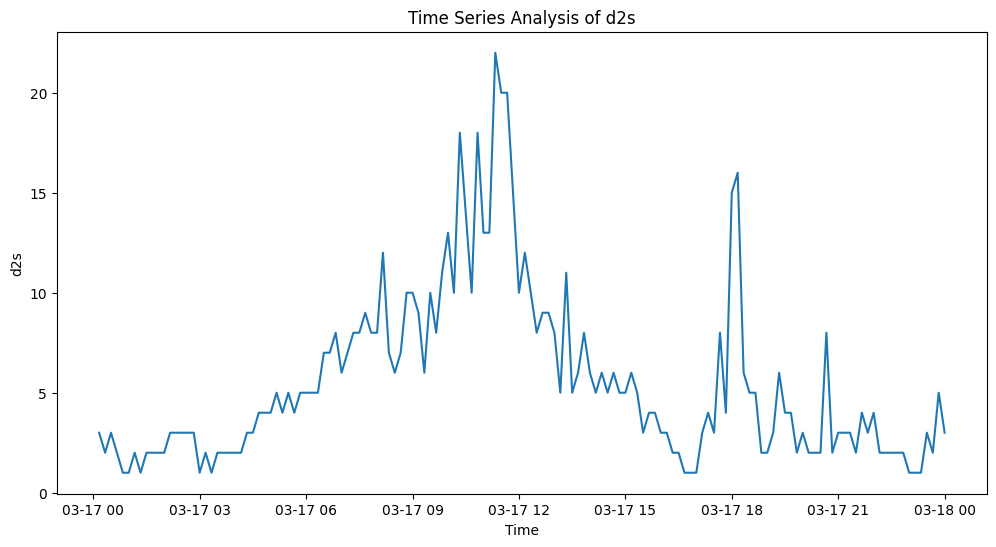

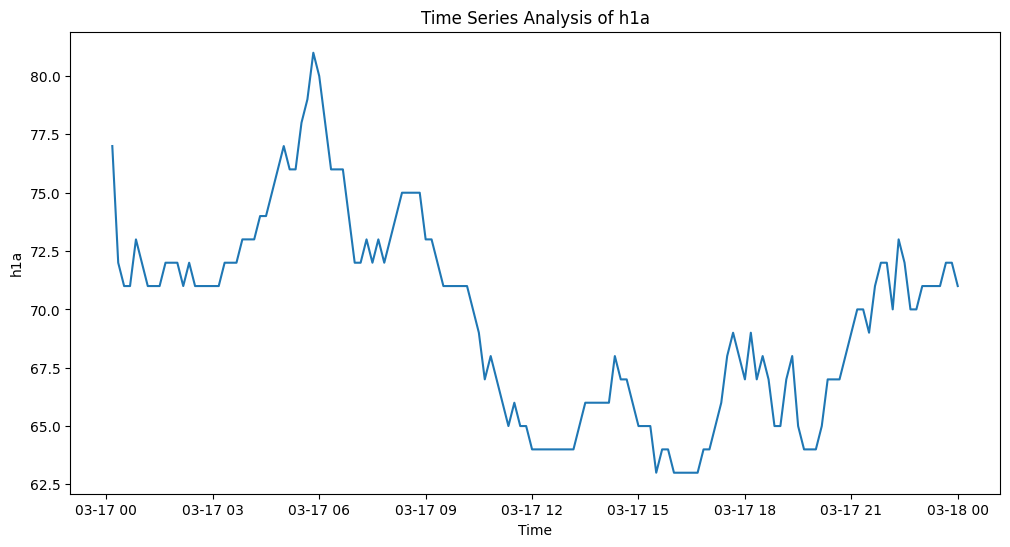

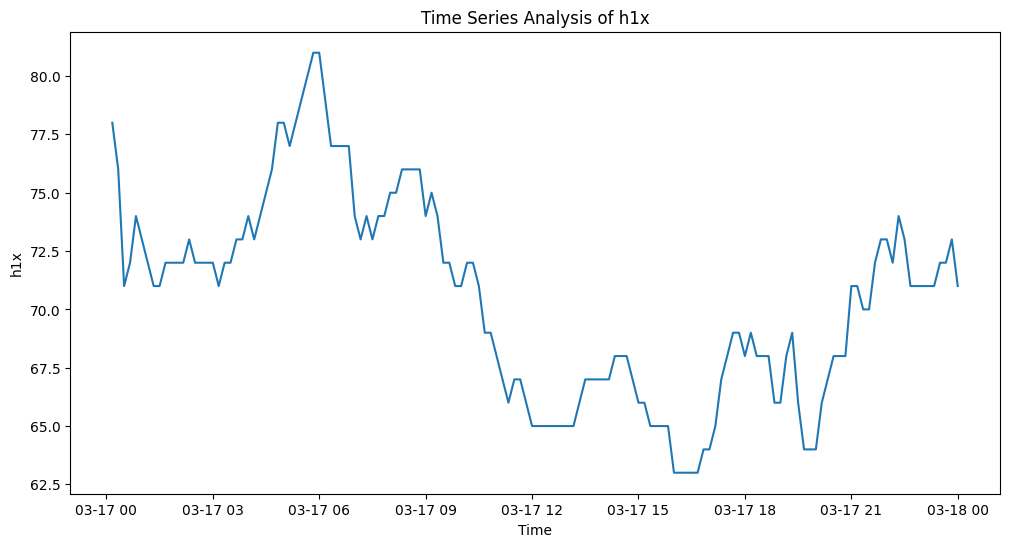

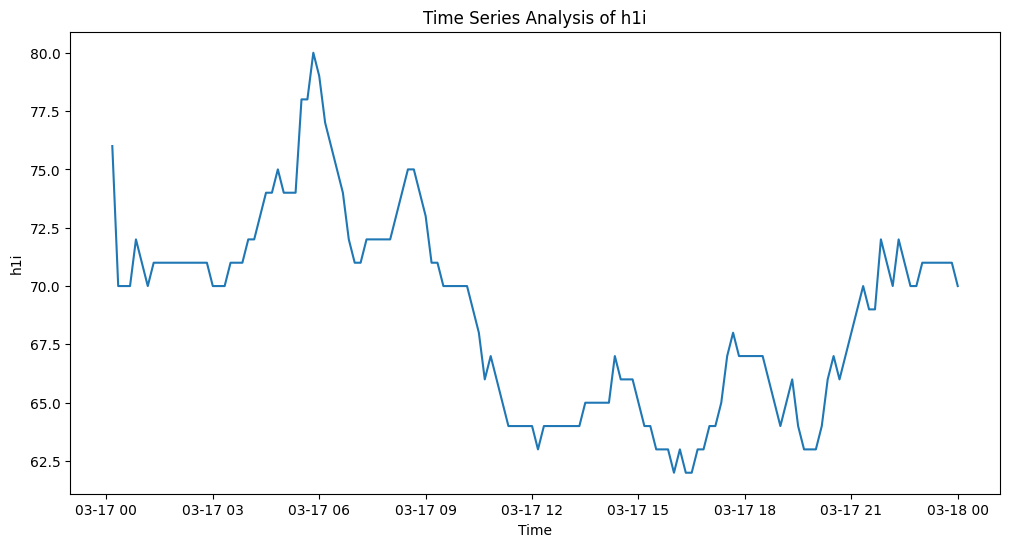

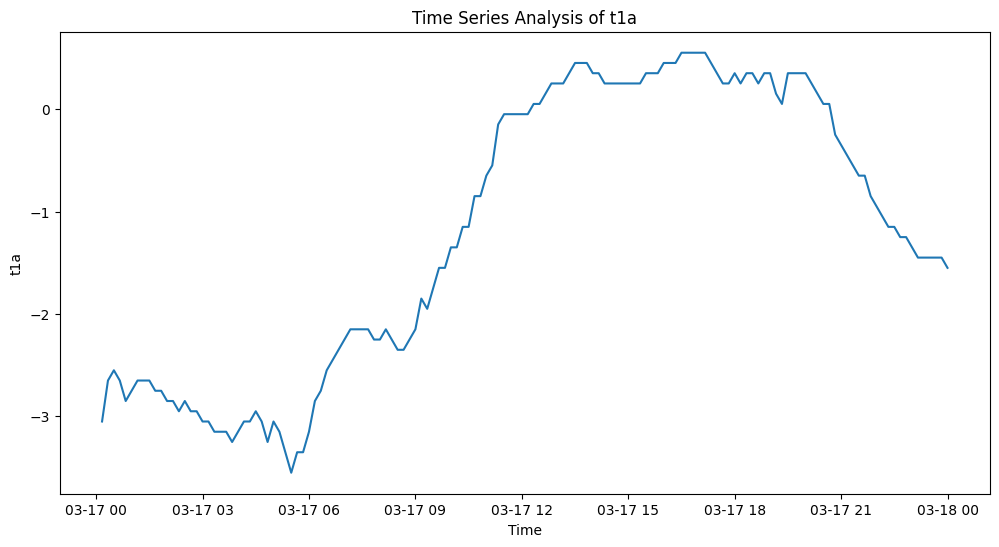

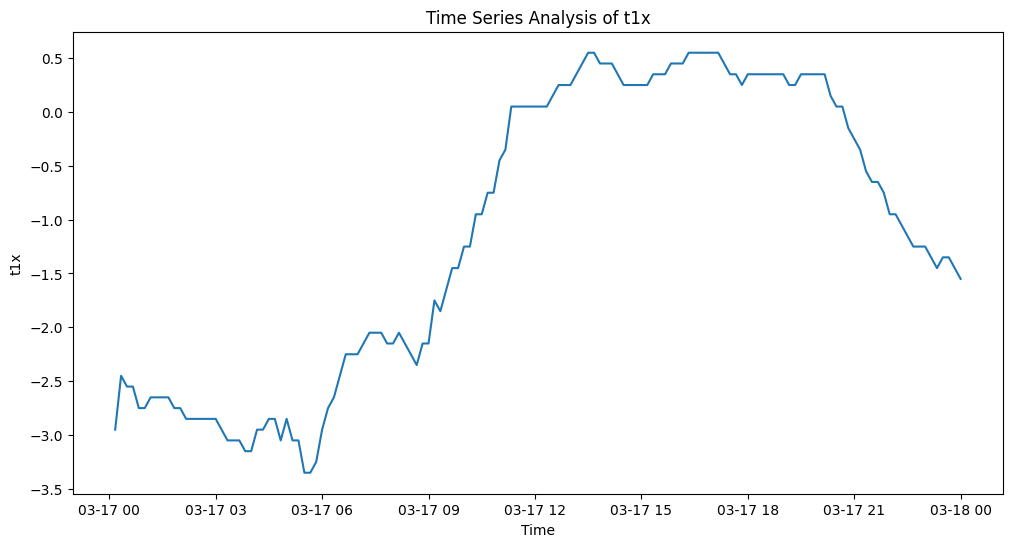

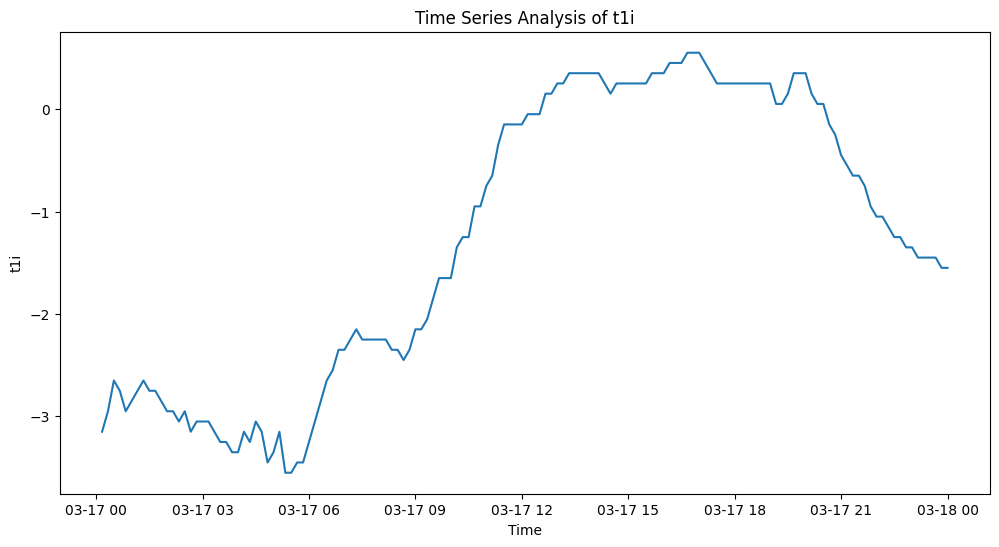

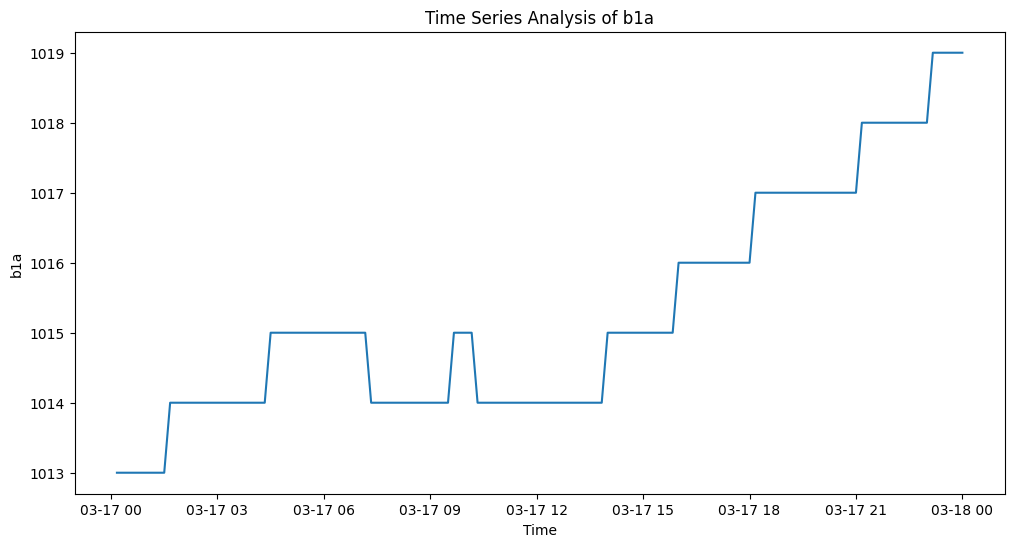

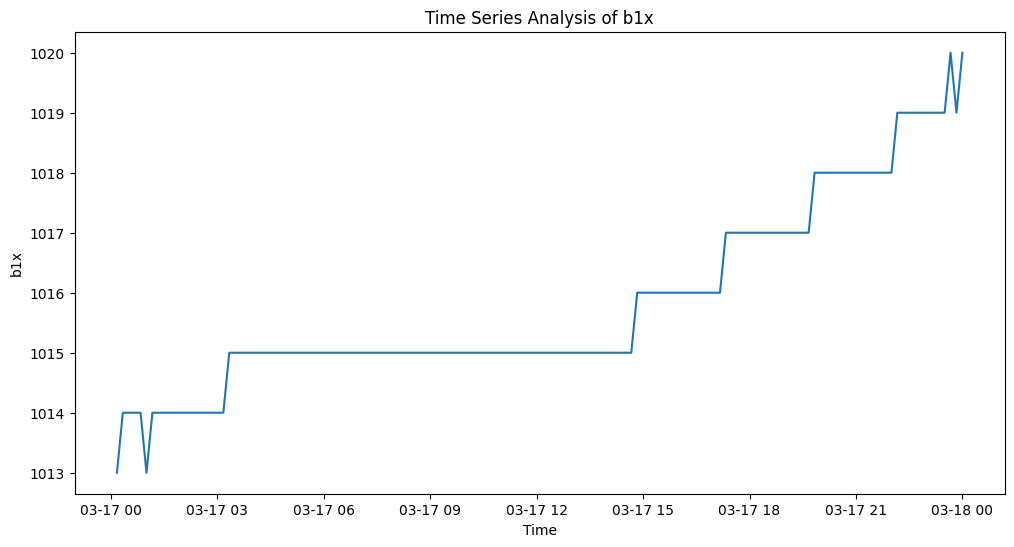

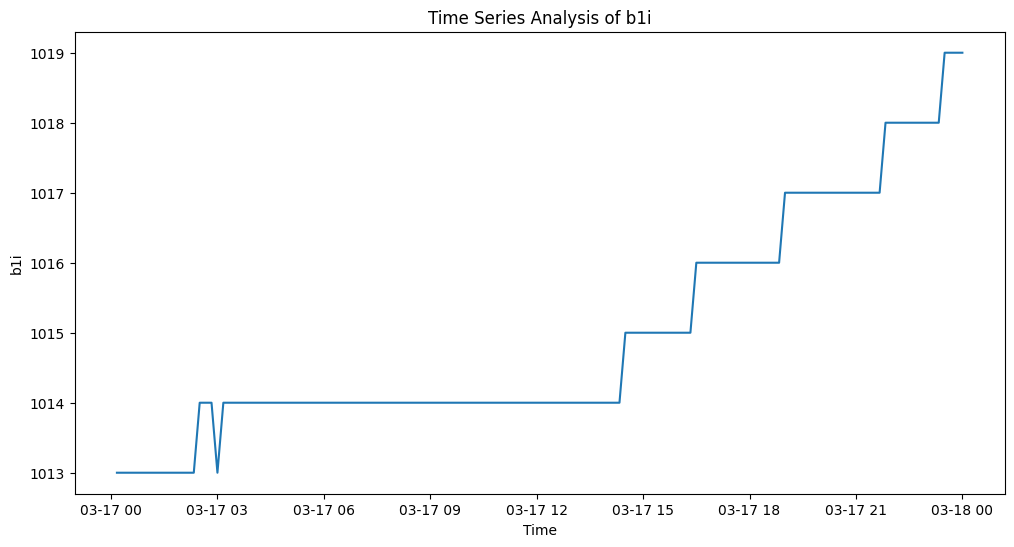

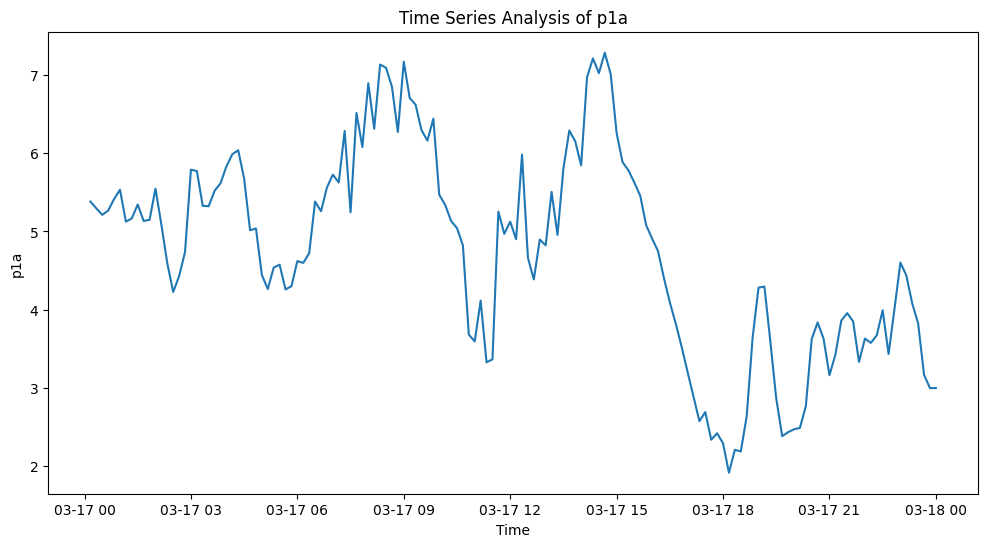

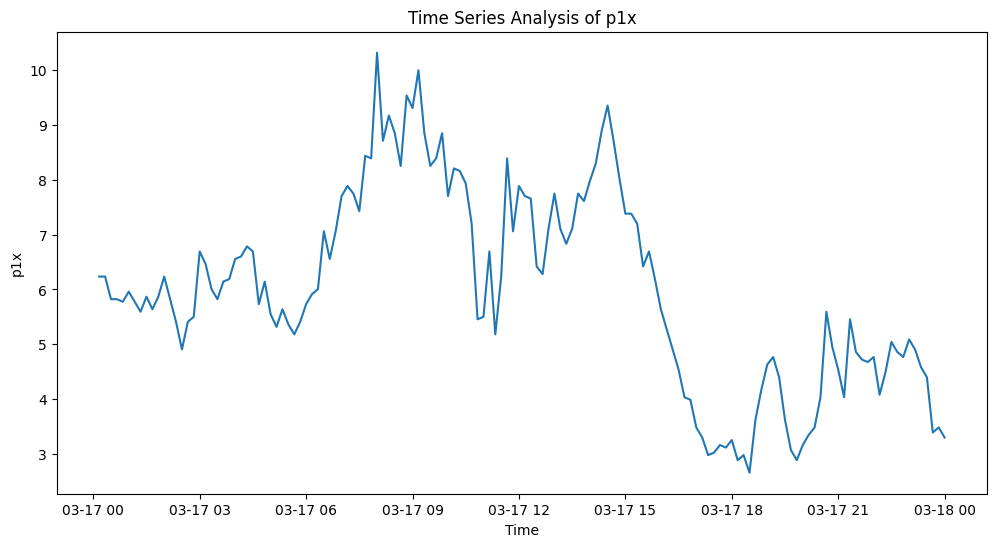

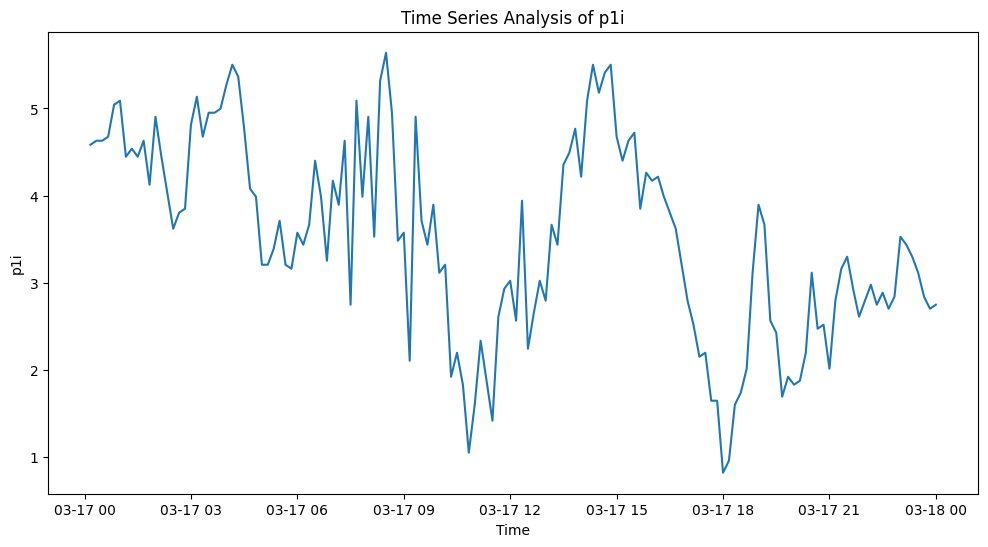

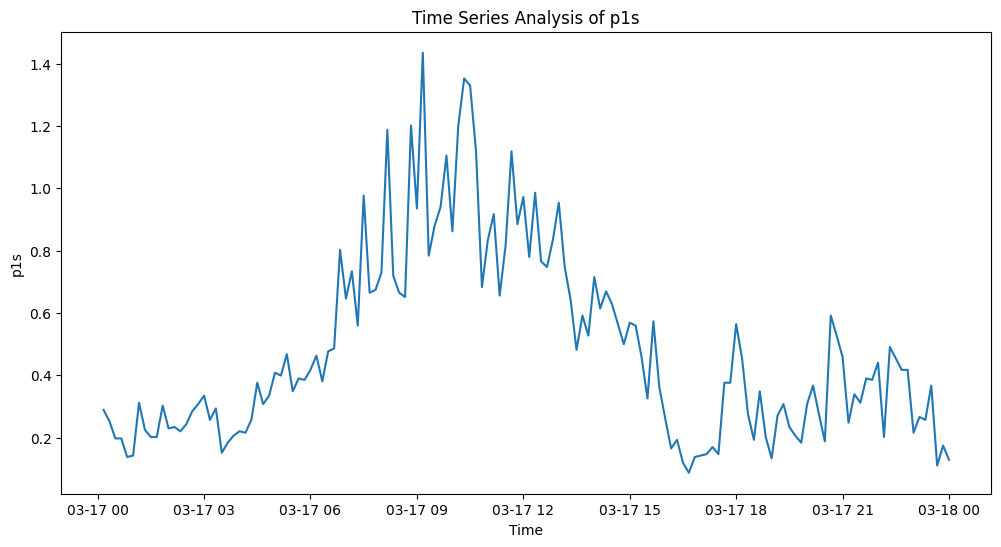

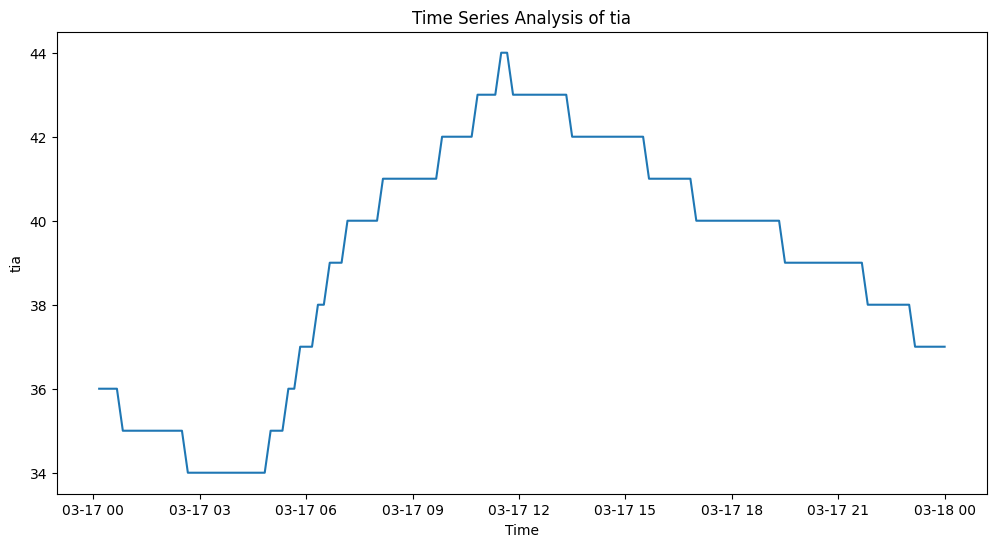

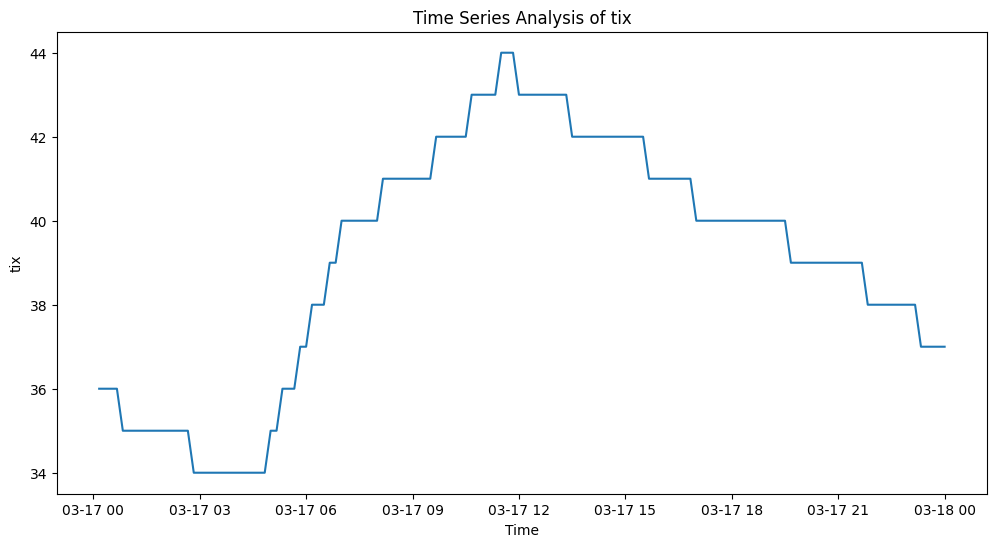

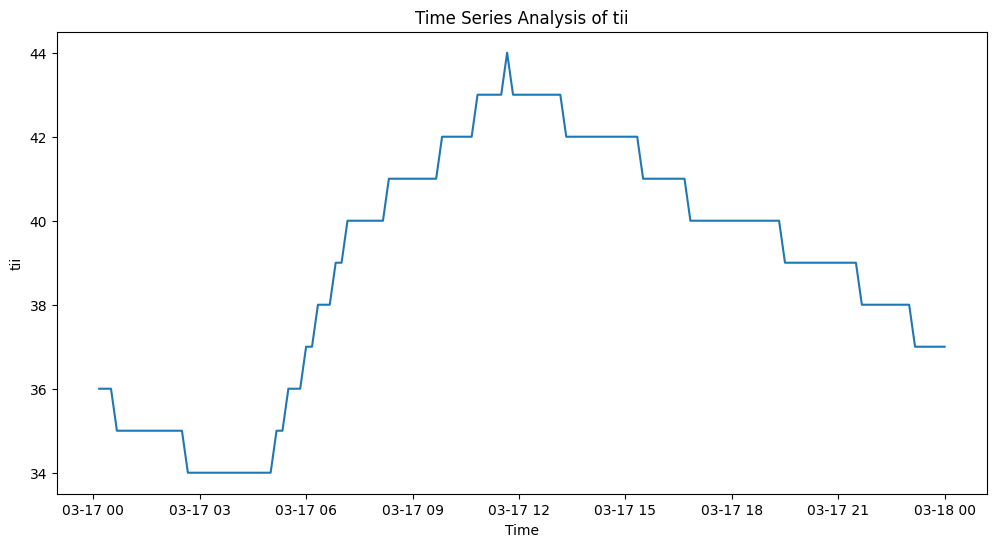

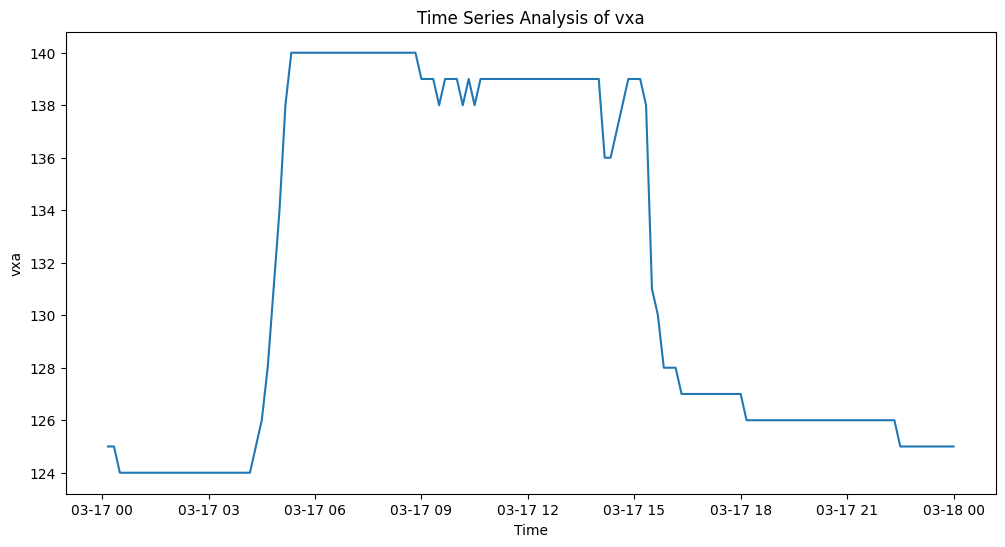

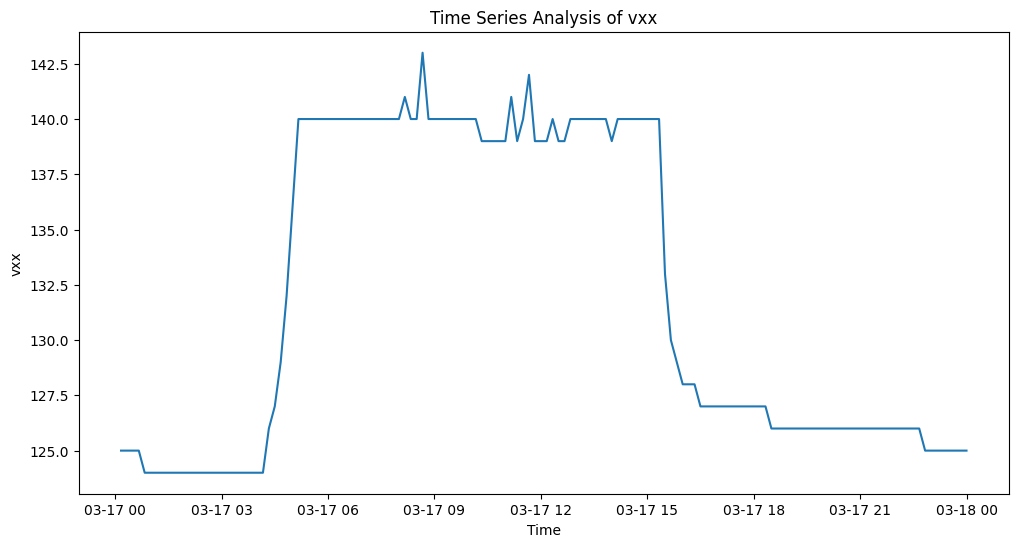

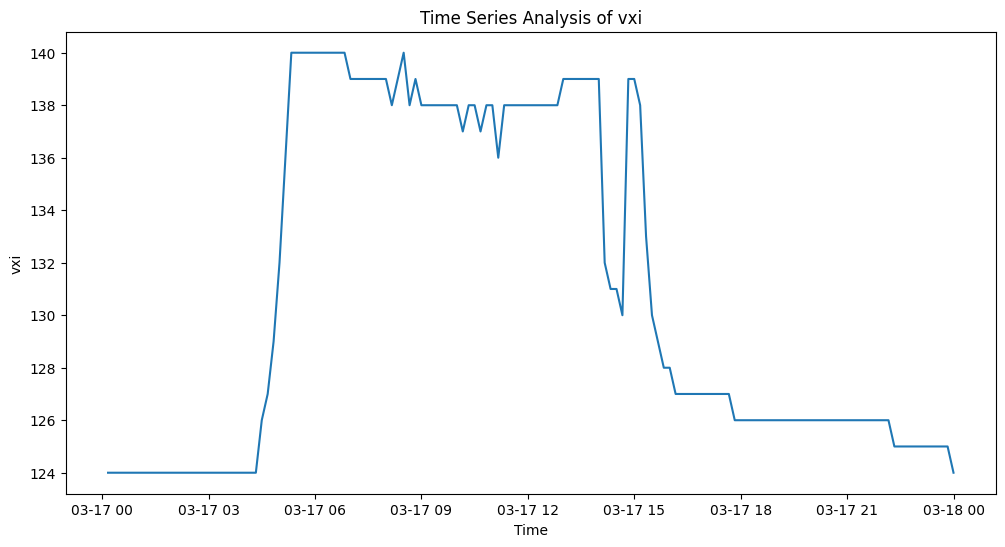

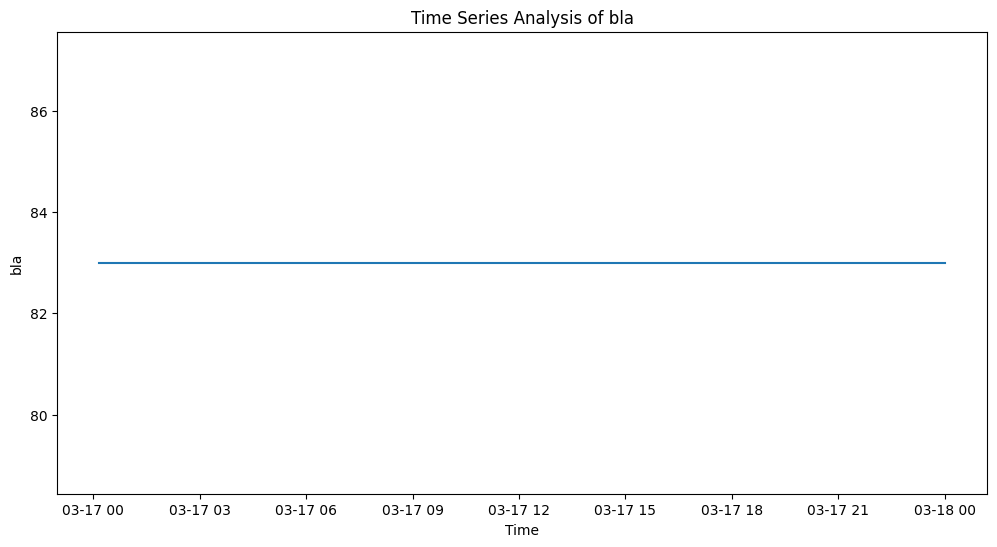

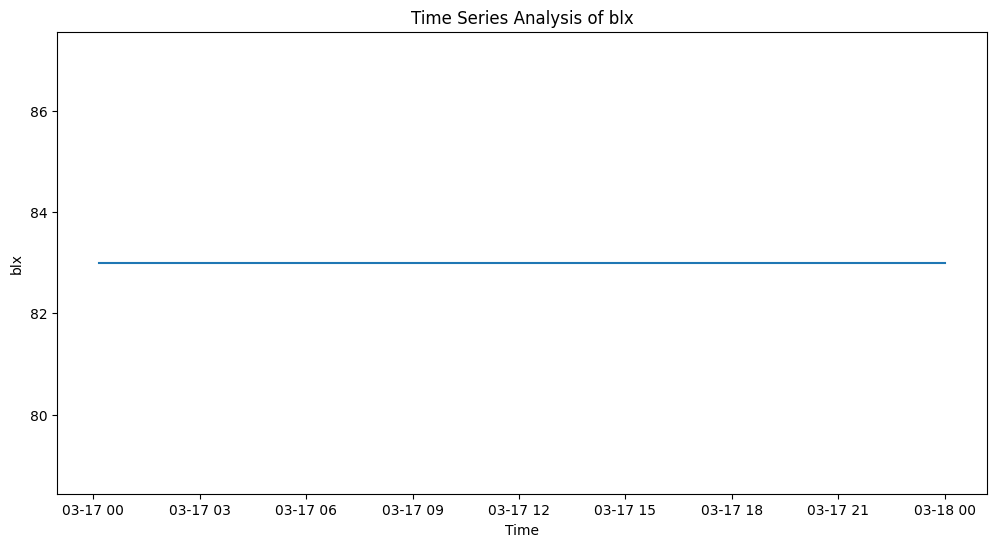

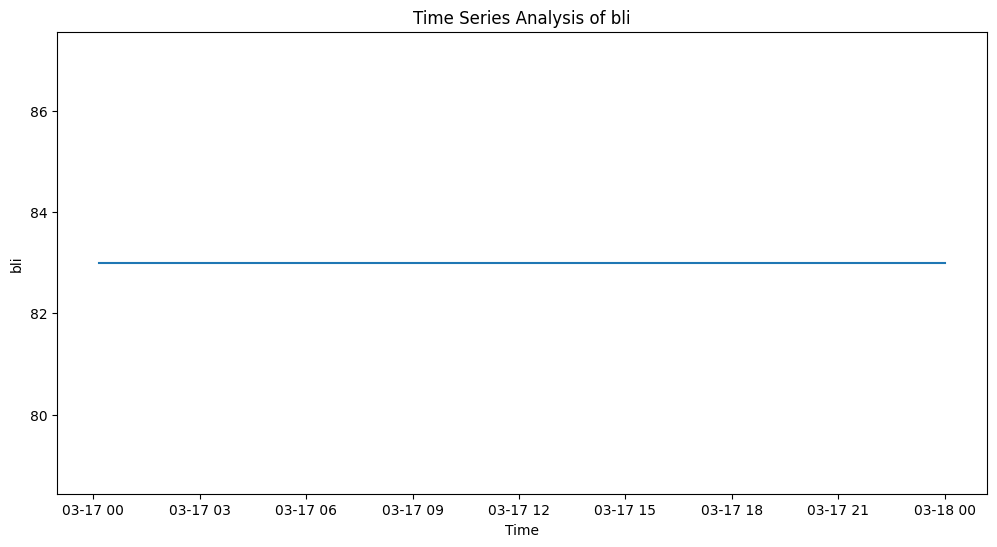

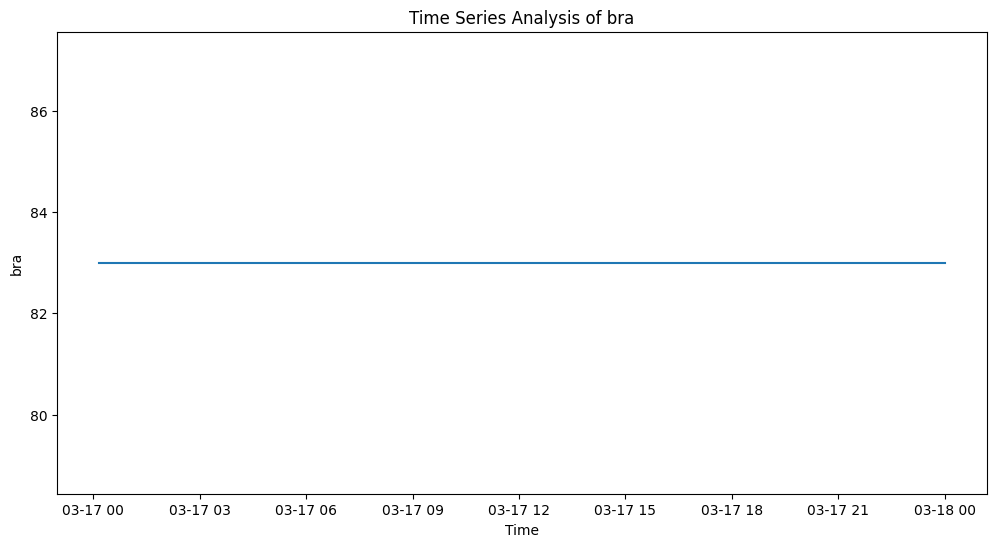

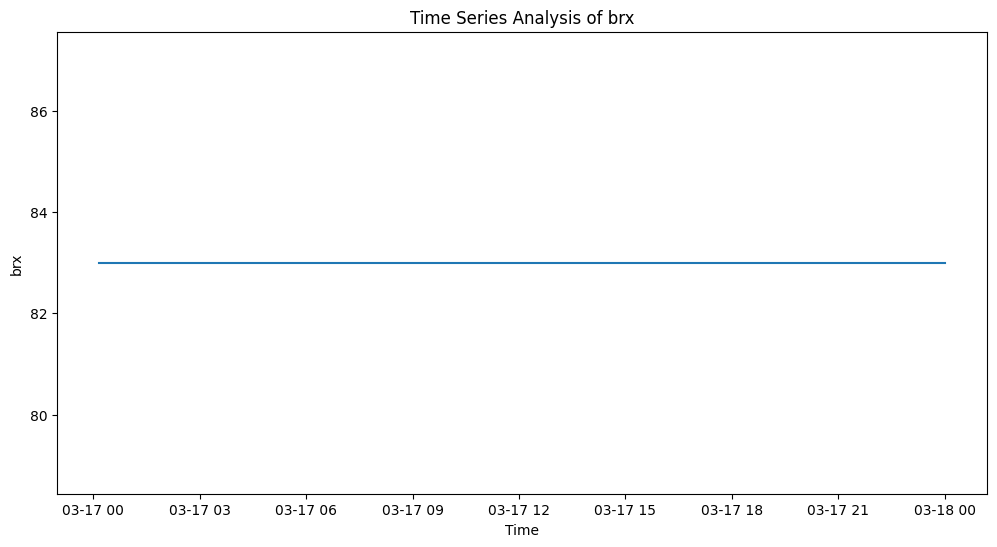

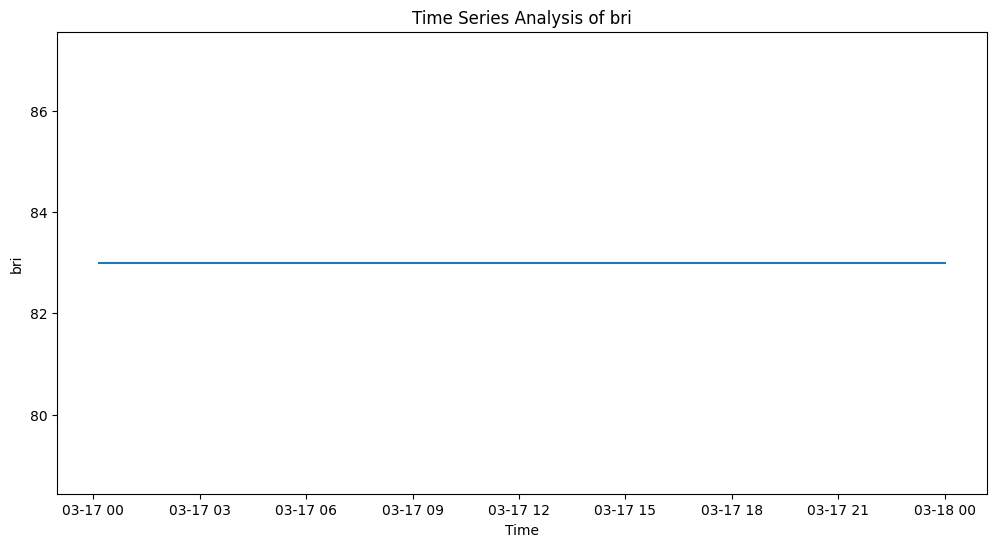

In [6]:
# Perform time series analysis for each column
for column in df.columns:
    if column not in ['date', 'time', 'period']:
        plt.figure(figsize=(12, 6))
        sns.lineplot(x=df.index, y=df[column])
        plt.title(f'Time Series Analysis of {column}')
        plt.xlabel('Time')
        plt.ylabel(column)
        plt.show()

In [7]:
# Exclude columns from correlation analysis
columns_to_exclude = ['datetime', 'date', 'time', 'period']
columns_for_correlation = [col for col in df.columns if col not in columns_to_exclude]

# Calculate correlation matrix
correlation_matrix = df[columns_for_correlation].corr()
#print(correlation_matrix)

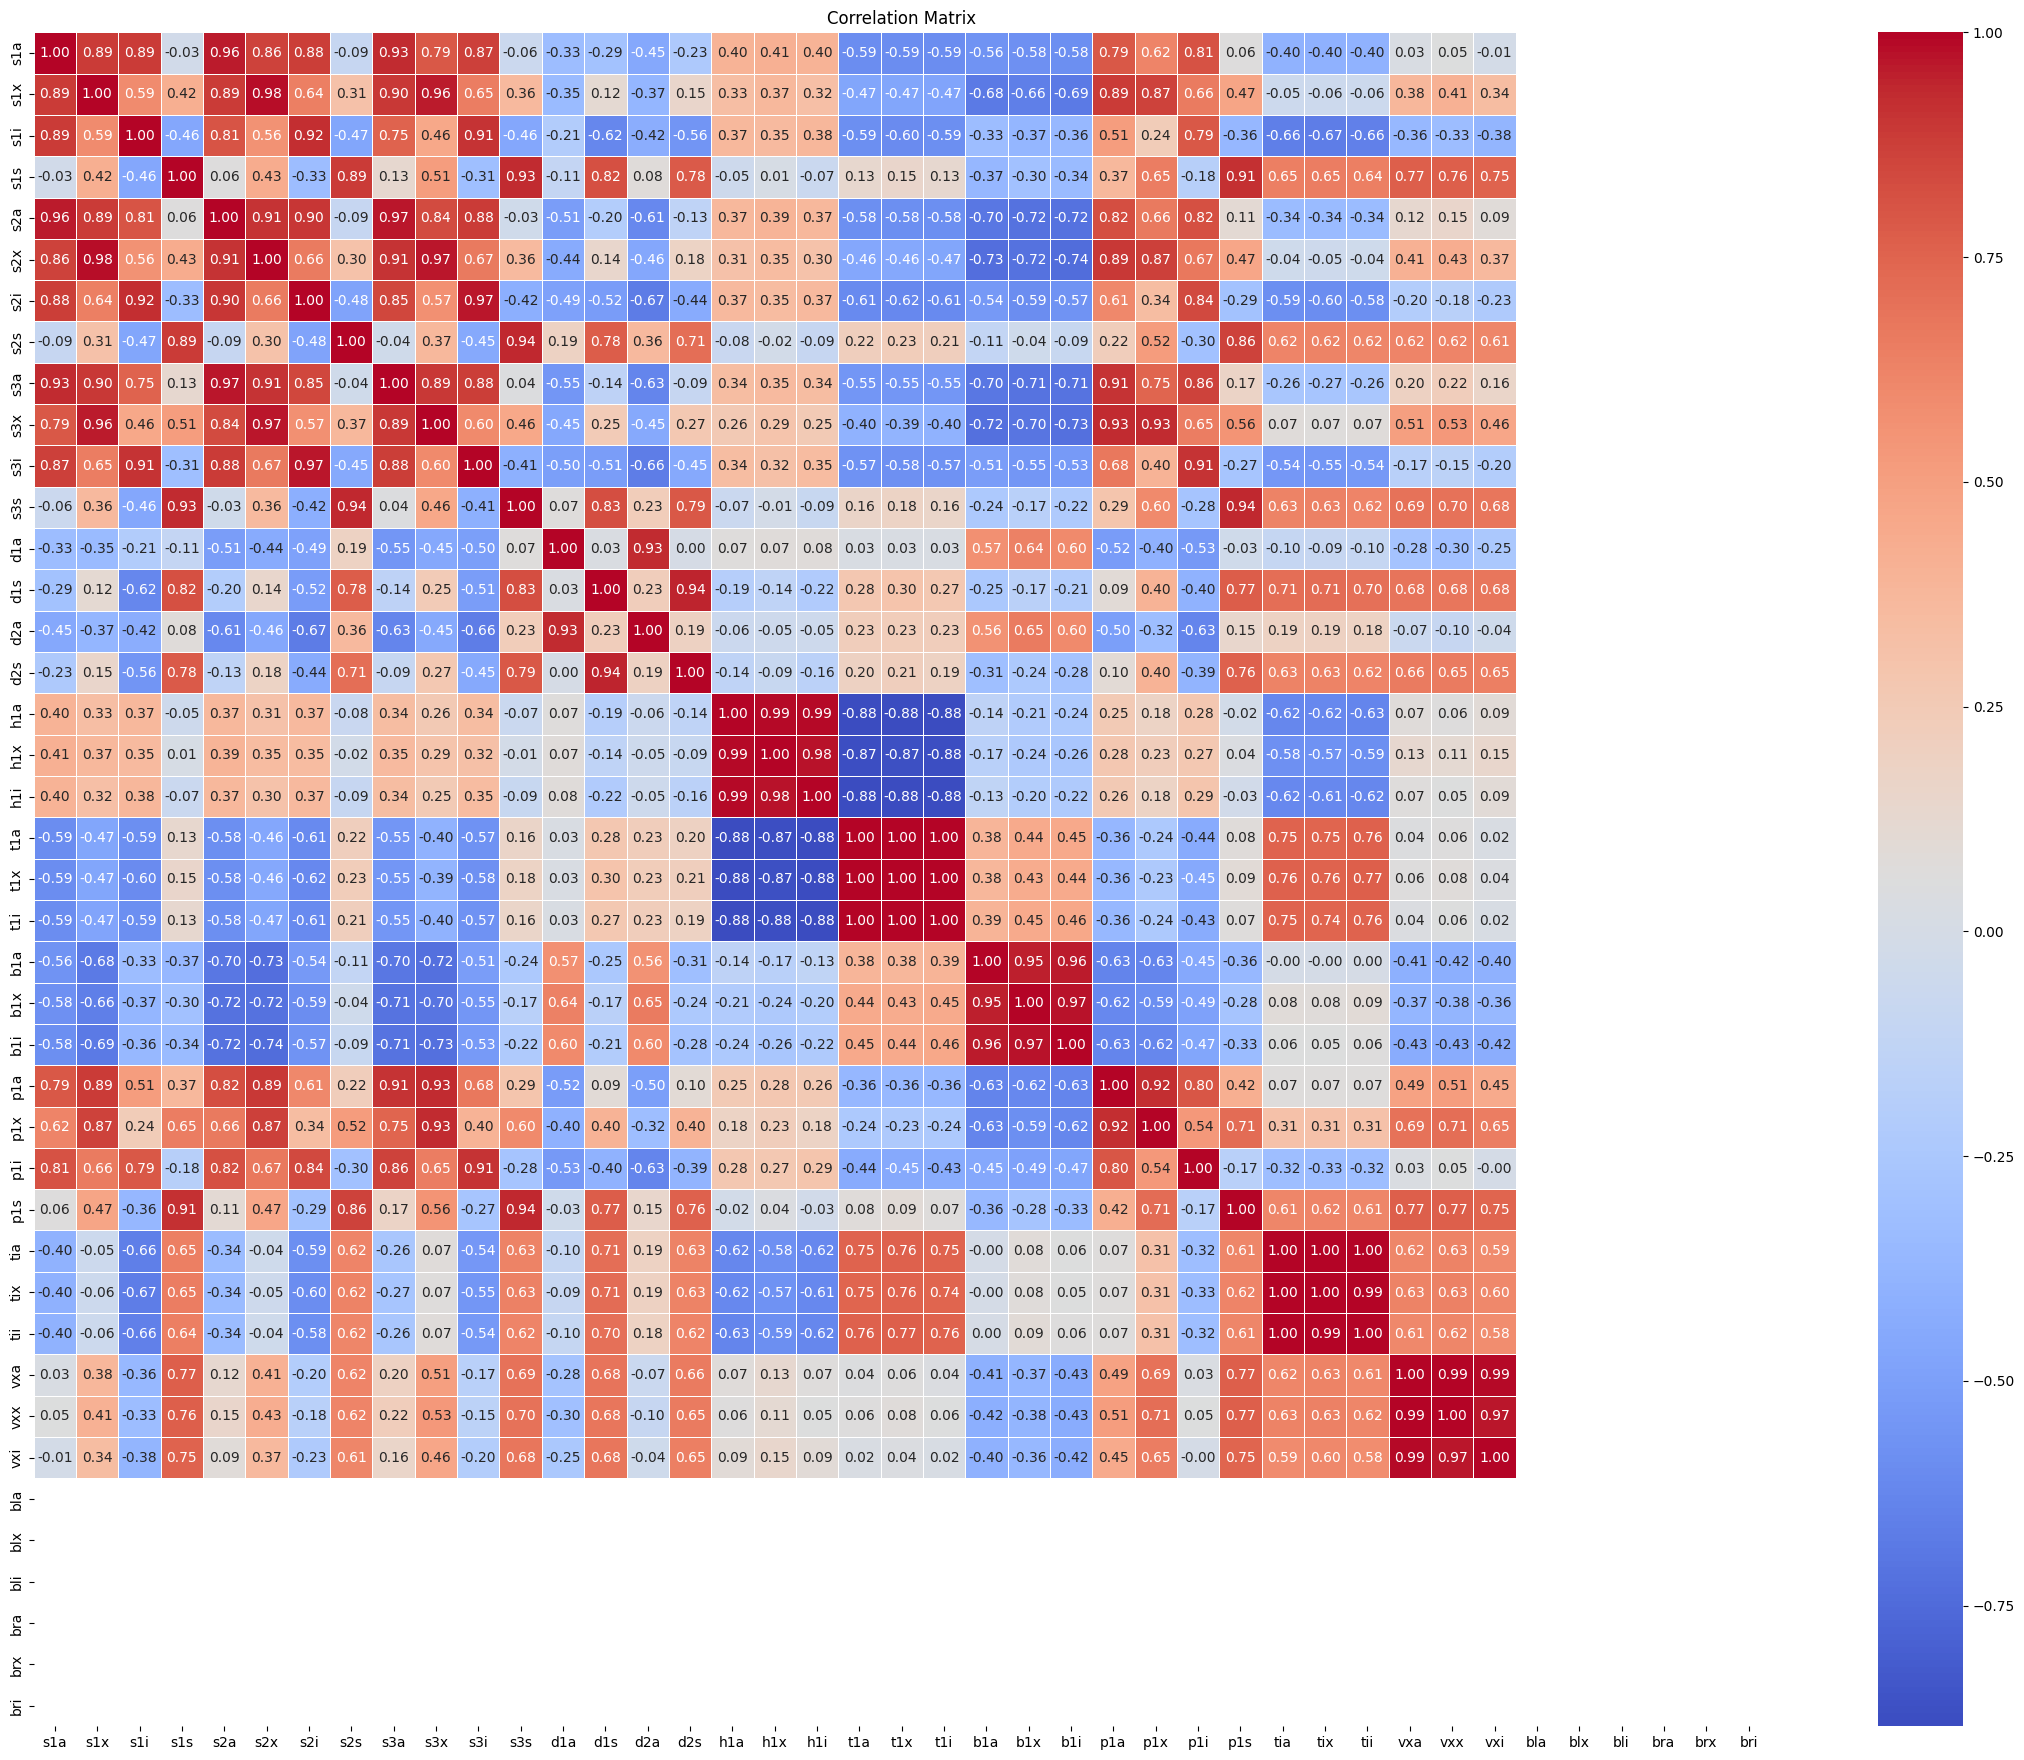

In [8]:
# Create a heatmap for the correlation matrix
#  The heatmap displays the correlation coefficients between different columns. 
# Positive values indicate a positive correlation, while negative values indicate a negative correlation. 
# Values closer to 1 or -1 indicate stronger correlations.
plt.figure(figsize=(28, 22))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

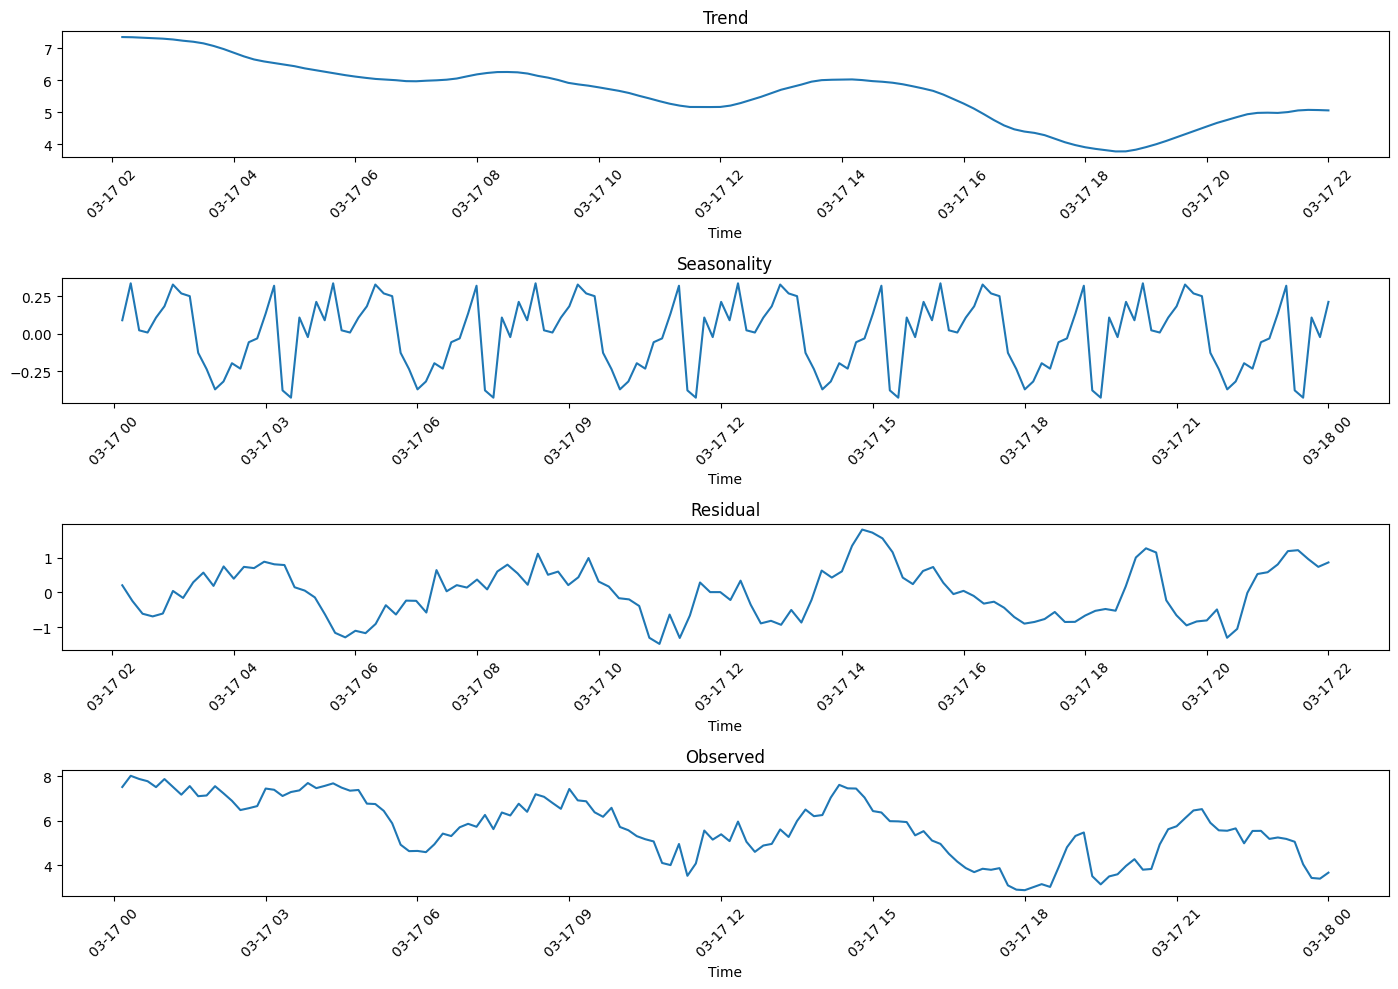

In [9]:
# Decompose the time series into trend, seasonality, and residual components
result = seasonal_decompose(df['s1a'], model='additive', period=24)  # Assuming seasonality is daily (24 hours)

# Increase figure size
plt.figure(figsize=(14, 10))

# Plot decomposed components
plt.subplot(4, 1, 1)
plt.plot(result.trend)
plt.title('Trend')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 2)
plt.plot(result.seasonal)
plt.title('Seasonality')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 3)
plt.plot(result.resid)
plt.title('Residual')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 4)
plt.plot(result.observed)
plt.title('Observed')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


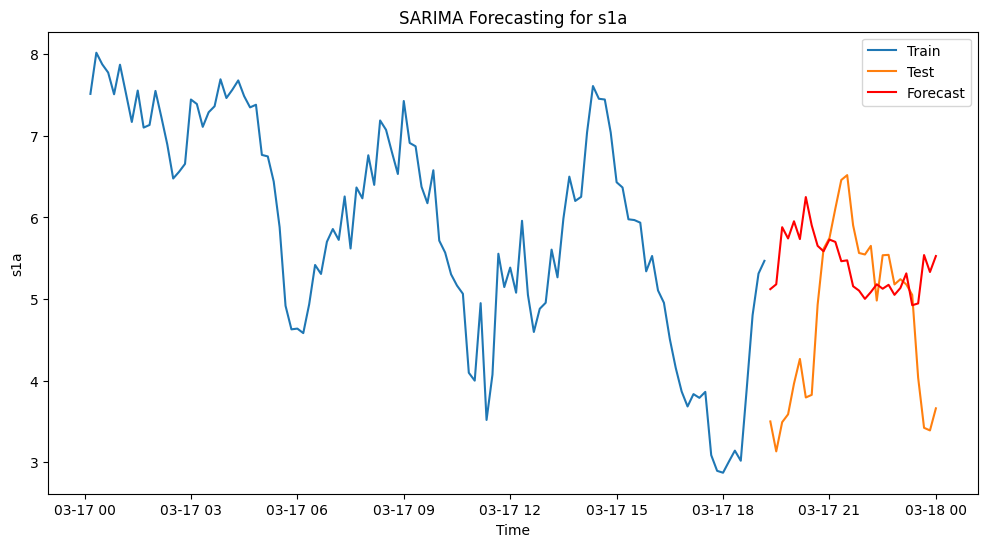

In [10]:
# Forecasting using SARIMA (Seasonal AutoRegressive Integrated Moving Average)
# Train-test split
train_size = int(len(df['s1a']) * 0.8)
train, test = df['s1a'][:train_size], df['s1a'][train_size:]

# Model fitting
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))  # Adjust order and seasonal_order as needed
fit_model = model.fit(disp=False)

# Forecast
forecast = fit_model.get_forecast(steps=len(test))
predicted_values = forecast.predicted_mean

# Visualize
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predicted_values, label='Forecast', color='red')
plt.title('SARIMA Forecasting for s1a')
plt.xlabel('Time')
plt.ylabel('s1a')
plt.legend()
plt.show()